# PROBLEM STATEMENT

In the telecom industry, customers switch from one operator to another, which contributes to an average of 15-25% annual churn rate. Cost of acquiring a new customer is 5-10 times more than retaining an existing one.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Business Objective

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Define high-value customers based on a certain metric and predict churn only on high-value customers.
The business objective is to predict the churn in the last month using the data (features) from the first three months. 

# The Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. The first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase. In the 'Good' phase, the customer is happy with the service. In the 'Action' phase, the customer experience starts to sore and 'churn' phase the customer is said to have churned.

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_data= pd.read_csv("E:/AIML/Machine Learning/GroupProject-Telecom Churn Case Study/telecom_churn_data.csv")

In [3]:
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

In [4]:
churn_data.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6     ...      \
99994            8/31/2014            9/30/2014   18.471     ...       
99995            8/31/2014            9/30/2014  112.201     ...       
99996            8/31/2014            9/30/2014  229.187     ...       
99997            8/31/2014            9/30/2014  322.991     ...       
99998            8/31/2014            9/30/2014  687.065     ...       

       sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  \
99994            0        NaN        NaN        NaN        NaN  3199   
99995            0        NaN        NaN        NaN        NaN  2052   
99996            0        1.0        NaN        NaN        NaN   185   
99997            0        1.0        1.0        1.0        1.0   478   
99998            0        1.0        NaN        NaN        NaN   751   

       aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
99994        0.00        0.00        0.00         0.0  
99995        0.00        0.00        0.00         0.0  
99996        0.00        0.00        0.00         0.0  
99997     1445.74     1151.03     1173.18         0.0  
99998        0.00        0.00        0.00         0.0  

[5 rows x 226 columns]

In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
churn_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6      ...        sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000      ...       99999.000000  25153.000000  25571.000000   
mean     132.395875      ...           0.084581      0.914404      0.908764   
std      297.207406      ...           0.650457      0.279772      0.287950   
min        0.000000      ...           0.000000      0.000000      0.000000   
25%        7.380000      ...           0.000000      1.000000      1.000000   
50%       34.310000      ...           0.000000      1.000000      1.000000   
75%      118.740000      ...           0.000000      1.000000      1.000000   
max     7376.710000      ...          49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

### Missing Value Calculation and Data cleaning

In [7]:
churn_data.isnull().any()

mobile_number           False
circle_id               False
loc_og_t2o_mou           True
std_og_t2o_mou           True
loc_ic_t2o_mou           True
last_date_of_month_6    False
last_date_of_month_7     True
last_date_of_month_8     True
last_date_of_month_9     True
arpu_6                  False
arpu_7                  False
arpu_8                  False
arpu_9                  False
onnet_mou_6              True
onnet_mou_7              True
onnet_mou_8              True
onnet_mou_9              True
offnet_mou_6             True
offnet_mou_7             True
offnet_mou_8             True
offnet_mou_9             True
roam_ic_mou_6            True
roam_ic_mou_7            True
roam_ic_mou_8            True
roam_ic_mou_9            True
roam_og_mou_6            True
roam_og_mou_7            True
roam_og_mou_8            True
roam_og_mou_9            True
loc_og_t2t_mou_6         True
                        ...  
arpu_2g_9                True
night_pck_user_6         True
night_pck_

In [8]:
churn_data.isnull().values.sum()

3594931

In [9]:
print(round(churn_data.isnull().sum()*100/churn_data.shape[0]),2)

mobile_number            0.0
circle_id                0.0
loc_og_t2o_mou           1.0
std_og_t2o_mou           1.0
loc_ic_t2o_mou           1.0
last_date_of_month_6     0.0
last_date_of_month_7     1.0
last_date_of_month_8     1.0
last_date_of_month_9     2.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              4.0
onnet_mou_7              4.0
onnet_mou_8              5.0
onnet_mou_9              8.0
offnet_mou_6             4.0
offnet_mou_7             4.0
offnet_mou_8             5.0
offnet_mou_9             8.0
roam_ic_mou_6            4.0
roam_ic_mou_7            4.0
roam_ic_mou_8            5.0
roam_ic_mou_9            8.0
roam_og_mou_6            4.0
roam_og_mou_7            4.0
roam_og_mou_8            5.0
roam_og_mou_9            8.0
loc_og_t2t_mou_6         4.0
                        ... 
arpu_2g_9               74.0
night_pck_user_6        75.0
night_pck_user_7        74.0
night_pck_user

In [10]:
# Drop the columns which have missing values greater than 70%
churn_data.loc[:, churn_data.isnull().sum()*100/churn_data.shape[0] > 70].columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [11]:
churn_data= churn_data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       ],axis=1)

In [12]:
#missing value imputation
recharge=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9']

special=['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

In [13]:
for value in recharge:
    churn_data[value].fillna(0,inplace=True)

In [14]:
for value in special:
    churn_data[value].fillna(-1, inplace=True)

In [15]:
print(round(churn_data.isnull().sum()*100/churn_data.shape[0]),2)

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_6    0.0
last_date_of_month_7    1.0
last_date_of_month_8    1.0
last_date_of_month_9    2.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             4.0
onnet_mou_7             4.0
onnet_mou_8             5.0
onnet_mou_9             8.0
offnet_mou_6            4.0
offnet_mou_7            4.0
offnet_mou_8            5.0
offnet_mou_9            8.0
roam_ic_mou_6           4.0
roam_ic_mou_7           4.0
roam_ic_mou_8           5.0
roam_ic_mou_9           8.0
roam_og_mou_6           4.0
roam_og_mou_7           4.0
roam_og_mou_8           5.0
roam_og_mou_9           8.0
loc_og_t2t_mou_6        4.0
                       ... 
arpu_2g_9               0.0
night_pck_user_6        0.0
night_pck_user_7        0.0
night_pck_user_8        0.0
night_pck_user_9    

In [16]:
churn_data.shape

(99999, 222)

In [17]:
#churn_data.to_csv('E:\PGDMLAI\Assignments\Telephone churn case study\cleaned_telecom_churn_data.csv')

### Data Preparation

In [18]:
churn_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6      ...        sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000      ...       99999.000000  99999.000000  99999.000000   
mean     132.395875      ...           0.084581     -0.518465     -0.511905   
std      297.207406      ...           0.650457      0.842420      0.845358   
min        0.000000      ...           0.000000     -1.000000     -1.000000   
25%        7.380000      ...           0.000000     -1.000000     -1.000000   
50%       34.310000      ...           0.000000     -1.000000     -1.000000   
75%      118.740000      ...           0.000000      0.000000      0.000000   
max     7376.710000      ...          49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean      -0.501975     -0.517595   1219.854749     68.170248     66.839062   
std        0.848097      0.834303    954.733842    267.580450    271.201856   
min       -1.000000     -1.000000    180.000000      0.000000      0.000000   
25%       -1.000000     -1.000000    467.000000      0.000000      0.000000   
50%       -1.000000     -1.000000    863.000000      0.000000      0.000000   
75%        0.000000      0.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [19]:
# Certain columns have same value in rows and the duplicate values do not offer any value to the model.

#churn_data.loc[:,churn_data.apply(lambda x: min(x) == max(x))].columns

In [20]:
churn_data= churn_data.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
        'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], axis=1)

In [21]:
churn_data.shape

(99999, 210)

In [22]:
#churn_data.to_csv('E:\PGDMLAI\Assignments\Telephone churn case study\cleaned_telecom_churn_data.csv')

In [23]:
# Filter High value customers
churn_data['avg_rch_amt']=(churn_data.total_rech_amt_6 + churn_data.total_rech_amt_7)/2

In [24]:
churn_data.avg_rch_amt.describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: avg_rch_amt, dtype: float64

In [25]:
# 70th percentile value of the average amount
churn_data.avg_rch_amt.quantile(0.7)

368.5

In [26]:
churn_eda= churn_data[churn_data.avg_rch_amt >= 368.5]

In [27]:
churn_eda.shape

(30011, 211)

In [28]:
churn_eda[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [29]:
churn_eda[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 4 columns):
total_ic_mou_9    30011 non-null float64
total_og_mou_9    30011 non-null float64
vol_2g_mb_9       30011 non-null float64
vol_3g_mb_9       30011 non-null float64
dtypes: float64(4)
memory usage: 1.1 MB


In [30]:
# Function to Tag the rows to be churn/not churn 
def tag_churn(total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9):
    if (total_ic_mou_9 == 0 or total_og_mou_9 == 0) and (vol_2g_mb_9 ==0 or vol_3g_mb_9 ==0) :
        return ('1')
    else:
        return('0')
    
    

In [31]:
churn_eda['churn']=churn_eda[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].apply(lambda x: tag_churn(x[0],x[1],x[2],x[3]), axis=1)

In [32]:
churn_eda.churn.value_counts()

0    26964
1     3047
Name: churn, dtype: int64

In [33]:
print(churn_eda.filter(like='_9').columns)

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'total_rech_data_9',
       'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9',
       'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthly_3g_9', 'sachet_3g_9', '

In [34]:
churn_eda= churn_eda.drop(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'total_rech_data_9',
       'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9',
       'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthly_3g_9', 'sachet_3g_9', 'fb_user_9'], axis=1)

In [35]:
churn_eda.shape

(30011, 161)

In [36]:
#Rows having missing values in column > 50%
len(churn_eda[churn_eda.isnull().sum(axis=1) >=50 ].index)

285

In [37]:
#% of rows having missing values in columns > 50% 
(len(churn_eda[churn_eda.isnull().sum(axis=1) >= 50].index)/ churn_eda.shape[0])*100

0.9496517943420746

In [38]:
# Dropping the rows having more than 50% missing values in the columns
churn_eda= churn_eda[churn_eda.isnull().sum(axis=1) < 50]

In [39]:
churn_eda.shape

(29726, 161)

In [40]:
churn_eda.churn.value_counts()

0    26891
1     2835
Name: churn, dtype: int64

In [41]:
#Rate of Churn
round((len(churn_eda[churn_eda.churn == '1'].index)/len(churn_eda.index))*100,2)

9.54

#### 9.54 % is the rate of churn ie. almost 9.5 % users churn while 90.5% of the users do not churn. Here we have a class imbalance where the data is distributed in majority and minority class and we have to predict the minority class.

In [42]:
#churn_eda.to_csv('E:\PGDMLAI\Assignments\Telephone churn case study\cleaned_telecom_churn_eda.csv')

In [43]:
churn_base_data= pd.DataFrame(churn_eda)

In [44]:
# Only Churned users
churned_yes=churn_eda[churn_eda.churn == '1']

In [45]:
churned_yes.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
7       7000701601            6/30/2014            7/31/2014   
97      7000589828            6/30/2014            7/31/2014   
111     7001300706            6/30/2014            7/31/2014   
143     7000106299            6/30/2014            7/31/2014   
188     7000340381            6/30/2014            7/31/2014   

    last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7              8/31/2014  1069.180  1349.850  3171.480        57.84   
97             8/31/2014   374.863   294.023   183.043       433.59   
111            8/31/2014   596.301   146.073     0.000        55.19   
143            8/31/2014   695.609    39.981     0.000      1325.91   
188                  NaN   734.641   183.668     0.000         4.38   

     onnet_mou_7  onnet_mou_8  ...    fb_user_6  fb_user_7  fb_user_8  aon  \
7          54.68        52.29  ...         -1.0       -1.0       -1.0  802   
97        415.66       221.06  ...         -1.0       -1.0       -1.0  502   
111         3.26          NaN  ...          1.0       -1.0       -1.0  332   
143        28.61          NaN  ...         -1.0       -1.0       -1.0  264   
188         0.98          NaN  ...          1.0       -1.0       -1.0  244   

     aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  avg_rch_amt  churn  
7         57.74       19.38       18.74         0.0       1185.0      1  
97         0.00        0.00        0.00         0.0        380.0      1  
111        0.00        0.00        0.00         0.0        441.0      1  
143        0.00        0.00        0.00         0.0        418.0      1  
188        0.00      831.48     1223.04         0.0        492.0      1  

[5 rows x 161 columns]

### Feature engineering

In [46]:
churned_yes.aon.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    2835.000000
mean      865.968607
std       737.459122
min       180.000000
10%       240.400000
20%       320.000000
30%       401.000000
40%       494.000000
50%       616.000000
60%       767.800000
70%       930.000000
80%      1196.400000
90%      1966.000000
max      3670.000000
Name: aon, dtype: float64

In [47]:
# Converting age on network to months
churned_yes['aon_month']= round(churned_yes['aon']/30.4375)

In [48]:
# Analysing the distribution of age on network and preparing Customer tenure variable
churned_yes.aon_month.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    2835.000000
mean       28.439153
std        24.225434
min         6.000000
10%         8.000000
20%        11.000000
30%        13.000000
40%        16.000000
50%        20.000000
60%        25.000000
70%        31.000000
80%        39.000000
90%        64.600000
max       121.000000
Name: aon_month, dtype: float64

In [49]:
#Function to define Customer tenure
def user_tenure(month):
    if month <= 6:
        return('0-6 M')
    elif month >6 and month <=12:
        return('6-12 M')
    elif month > 12 and month <=24:
        return ('12-24 M')
    elif month > 24 and month <=36:
        return('24-36 M')
    elif month > 36 and month <=48:
        return('36-48 M')
    elif month >48 and month <=60:
        return ('48-60 M')
    else:
        return ('>60 M')
    

In [50]:
churned_yes['user_tenure']= churned_yes['aon_month'].apply(lambda x: user_tenure(x))

In [51]:
churned_yes.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
7       7000701601            6/30/2014            7/31/2014   
97      7000589828            6/30/2014            7/31/2014   
111     7001300706            6/30/2014            7/31/2014   
143     7000106299            6/30/2014            7/31/2014   
188     7000340381            6/30/2014            7/31/2014   

    last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7              8/31/2014  1069.180  1349.850  3171.480        57.84   
97             8/31/2014   374.863   294.023   183.043       433.59   
111            8/31/2014   596.301   146.073     0.000        55.19   
143            8/31/2014   695.609    39.981     0.000      1325.91   
188                  NaN   734.641   183.668     0.000         4.38   

     onnet_mou_7  onnet_mou_8     ...       fb_user_8  aon  aug_vbc_3g  \
7          54.68        52.29     ...            -1.0  802       57.74   
97        415.66       221.06     ...            -1.0  502        0.00   
111         3.26          NaN     ...            -1.0  332        0.00   
143        28.61          NaN     ...            -1.0  264        0.00   
188         0.98          NaN     ...            -1.0  244        0.00   

     jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  avg_rch_amt  churn  aon_month  \
7         19.38       18.74         0.0       1185.0      1       26.0   
97         0.00        0.00         0.0        380.0      1       16.0   
111        0.00        0.00         0.0        441.0      1       11.0   
143        0.00        0.00         0.0        418.0      1        9.0   
188      831.48     1223.04         0.0        492.0      1        8.0   

     user_tenure  
7        24-36 M  
97       12-24 M  
111       6-12 M  
143       6-12 M  
188       6-12 M  

[5 rows x 163 columns]

In [52]:
churned_yes.user_tenure.value_counts()

12-24 M    860
6-12 M     693
24-36 M    538
>60 M      304
36-48 M    210
48-60 M    126
0-6 M      104
Name: user_tenure, dtype: int64

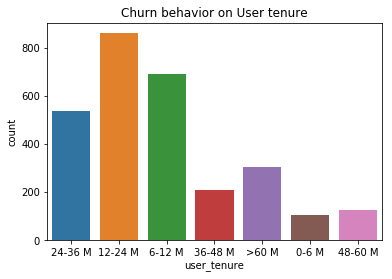

In [53]:
sns.countplot(churned_yes.user_tenure)
plt.title('Churn behavior on User tenure')
plt.show()

#### The users tenure with the particular telecom company shows that the users with 6-24 month tenure churn the most followed by 24-36 month.

(0, 800)

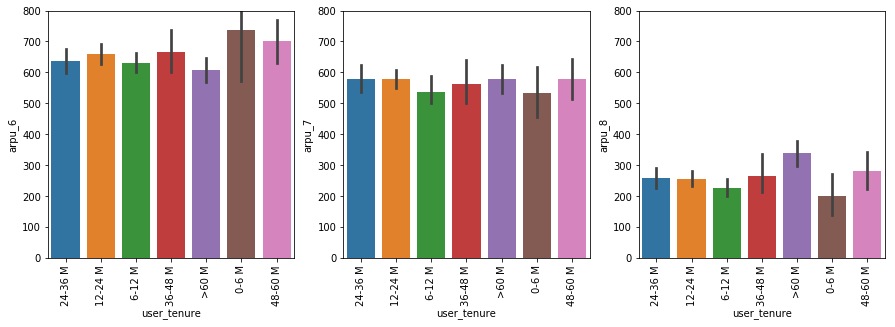

In [54]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.barplot(x='user_tenure', y= 'arpu_6', data= churned_yes)
plt.xticks(rotation=90)
plt.ylim(0,800)

plt.subplot(2,3,2)
sns.barplot(x='user_tenure', y= 'arpu_7', data= churned_yes)
plt.xticks(rotation=90)
plt.ylim(0,800)

plt.subplot(2,3,3)
sns.barplot(x='user_tenure', y= 'arpu_8', data= churned_yes)
plt.xticks(rotation=90)
plt.ylim(0,800)


#### Average revenue per user shows a decreasing pattern from good phase to action phase.

In [55]:
churned_yes['avg_arpu_gp']= (churned_yes.arpu_6 + churned_yes.arpu_7) /2

In [56]:
churned_yes['%_reduction_arpu']=round(100*((churned_yes.avg_arpu_gp - churned_yes.arpu_8)/churned_yes.avg_arpu_gp))

Text(0.5,1,'% Reduction of ARPU from Good Phase to Action Phase')

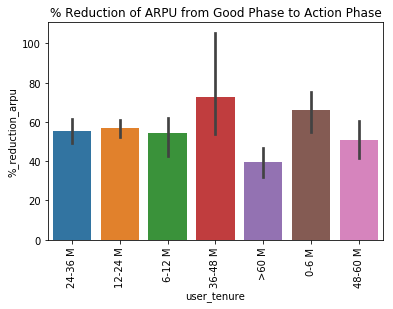

In [57]:
sns.barplot(x='user_tenure', y= '%_reduction_arpu', data= churned_yes)
plt.xticks(rotation=90)
plt.title('% Reduction of ARPU from Good Phase to Action Phase')

#### The plot shows that when the average revenue per user drops in a range of 30-50% from good phase to action phase, the probablity of churn increases.

In [58]:
# Function to find reduction of variable values when user moves from Good phase to action phase
def percent_reduction(june,july,aug):
    if june+july == 0:
        return 0
    else:
        return(round(100*((((june+july)/2)-aug)/((june+july)/2))))

In [59]:
churn_eda['%_reduction_arpu']= churn_eda[['arpu_6','arpu_7','arpu_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)

In [60]:
churn_eda=churn_eda.drop(['arpu_6','arpu_7','arpu_8'], axis=1)

In [61]:
# % reduction in on and off network mou
churn_eda['%_reduction_onnet_mou']= churn_eda[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_offnet_mou']= churn_eda[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda=churn_eda.drop(['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8'], axis=1)
# % reduction in roaming incoming and outgoing mou
churn_eda['%_reduction_roam_ic_mou']= churn_eda[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_roam_og_mou']= churn_eda[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda=churn_eda.drop(['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'], axis=1)
# % reduction in outgoing Local mou
churn_eda['%_reduction_loc_og_t2t_mou']= churn_eda[['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_loc_og_t2m_mou']= churn_eda[['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_loc_og_t2f_mou']= churn_eda[['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_loc_og_t2c_mou']= churn_eda[['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_loc_og_mou']= churn_eda[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda=churn_eda.drop(['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8'
                          ,'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8', 'loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8'], axis=1)
# % reduction in outgoing STD mou
churn_eda['%_reduction_std_og_t2t_mou']= churn_eda[['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_std_og_t2m_mou']= churn_eda[['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_std_og_t2f_mou']= churn_eda[['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_std_og_mou']= churn_eda[['std_og_mou_6','std_og_mou_7','std_og_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda=churn_eda.drop(['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8',
                         'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8'], axis=1)


churn_eda['%_reduction_isd_og_mou']= churn_eda[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_spl_og_mou']= churn_eda[['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_og_others']= churn_eda[['og_others_6','og_others_7','og_others_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_total_og_mou']= churn_eda[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda=churn_eda.drop(['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8',
                          'og_others_6','og_others_7','og_others_8','total_og_mou_6','total_og_mou_7','total_og_mou_8'], axis=1)

# % reduction in incoming Local mou
churn_eda['%_reduction_loc_ic_t2t_mou']= churn_eda[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_loc_ic_t2m_mou']= churn_eda[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_loc_ic_t2f_mou']= churn_eda[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_loc_ic_mou']= churn_eda[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda=churn_eda.drop(['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8',
                         'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                         'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                         'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8'], axis=1)


# % reduction in incoming STD mou
churn_eda['%_reduction_std_ic_t2t_mou']= churn_eda[['std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_std_ic_t2m_mou']= churn_eda[['std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_std_ic_t2f_mou']= churn_eda[['std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_std_ic_mou']= churn_eda[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda=churn_eda.drop(['std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8',
                         'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8',
                         'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8',
                         'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8'], axis=1)


churn_eda['%_reduction_isd_ic_mou']= churn_eda[['isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_spl_ic_mou']= churn_eda[['spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_ic_others']= churn_eda[['ic_others_6','ic_others_7','ic_others_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda['%_reduction_total_ic_mou']= churn_eda[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda=churn_eda.drop(['isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8',
                         'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8',
                         'ic_others_6','ic_others_7','ic_others_8',
                         'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'], axis=1)


In [62]:
churn_eda.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
7      7000701601            6/30/2014            7/31/2014   
8      7001524846            6/30/2014            7/31/2014   
13     7002191713            6/30/2014            7/31/2014   
16     7000875565            6/30/2014            7/31/2014   
17     7000187447            6/30/2014            7/31/2014   

   last_date_of_month_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7             8/31/2014        422.16        533.91        255.79   
8             8/31/2014        378.09        288.18         63.04   
13            8/31/2014        205.31         53.48        353.99   
16            8/31/2014        315.91        215.64        205.93   
17            8/31/2014         97.54          0.00          0.00   

    std_og_mou_6  std_og_mou_7  std_og_mou_8           ...             \
7          60.86         75.14         77.84           ...              
8         130.26        143.48         98.28           ...              
13        701.78        138.93        655.18           ...              
16         30.89         67.09         21.53           ...              
17       1148.46          0.81          0.00           ...              

    %_reduction_loc_ic_t2f_mou  %_reduction_loc_ic_mou  \
7                         69.0                    52.0   
8                          0.0                    70.0   
13                      -211.0                  -111.0   
16                      -276.0                    16.0   
17                         0.0                   100.0   

    %_reduction_std_ic_t2t_mou  %_reduction_std_ic_t2m_mou  \
7                        -25.0                       -29.0   
8                         66.0                        95.0   
13                      -101.0                       -88.0   
16                        91.0                       -61.0   
17                       100.0                       100.0   

    %_reduction_std_ic_t2f_mou  %_reduction_std_ic_mou  \
7                         49.0                   -10.0   
8                          0.0                    94.0   
13                         0.0                   -93.0   
16                      -755.0                    31.0   
17                         0.0                   100.0   

    %_reduction_isd_ic_mou  %_reduction_spl_ic_mou  %_reduction_ic_others  \
7                   -281.0                   100.0                    2.0   
8                      0.0                     0.0                    0.0   
13                  -156.0                   100.0                   57.0   
16                     0.0                     0.0                    0.0   
17                     0.0                     0.0                    0.0   

   %_reduction_total_ic_mou  
7                      28.0  
8                      75.0  
13                   -101.0  
16                     21.0  
17                    100.0  

[5 rows x 107 columns]

In [63]:
# Converting age of network from days to months
churn_eda['aon_month']= round(churn_eda['aon']/30.4375)

In [64]:
# Preparing User tenure derived variable based on months of usage
churn_eda['user_tenure']= churn_eda['aon_month'].apply(lambda x: user_tenure(x))

In [65]:
# Coverting the DateTime format mm/dd/yyyy
churn_eda ['date_of_last_rech_6']= pd.to_datetime(churn_eda['date_of_last_rech_6'], format = '%m/%d/%Y')
churn_eda ['date_of_last_rech_7']= pd.to_datetime(churn_eda['date_of_last_rech_7'], format = '%m/%d/%Y')
churn_eda ['date_of_last_rech_8']= pd.to_datetime(churn_eda['date_of_last_rech_8'], format = '%m/%d/%Y')


churn_eda ['last_date_of_month_6']= pd.to_datetime(churn_eda['last_date_of_month_6'], format = '%m/%d/%Y')
churn_eda ['last_date_of_month_7']= pd.to_datetime(churn_eda['last_date_of_month_7'], format = '%m/%d/%Y')
churn_eda ['last_date_of_month_8']= pd.to_datetime(churn_eda['last_date_of_month_8'], format = '%m/%d/%Y')


In [66]:
# Calculating how many days earlier the user recharged from last day of a particular month
churn_eda['lastday_lastrech_6']=(churn_eda ['last_date_of_month_6']-churn_eda ['date_of_last_rech_6'])
churn_eda['lastday_lastrech_7']=(churn_eda ['last_date_of_month_7']-churn_eda ['date_of_last_rech_7'])
churn_eda['lastday_lastrech_8']=(churn_eda ['last_date_of_month_8']-churn_eda ['date_of_last_rech_8'])

In [67]:
# Extracting days from the time delta
churn_eda['lastday_lastrech_6'] =(churn_eda['lastday_lastrech_6']).dt.days
churn_eda['lastday_lastrech_7'] =(churn_eda['lastday_lastrech_7']).dt.days
churn_eda['lastday_lastrech_8'] =(churn_eda['lastday_lastrech_8']).dt.days

In [68]:
churn_eda['lastday_lastrech_7'].dtype

dtype('float64')

In [69]:
churn_eda= churn_eda.drop(['aon_month','aon','mobile_number','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], axis=1)

Text(0.5,1,'% Reduction of ARPU from Good Phase to Action Phase')

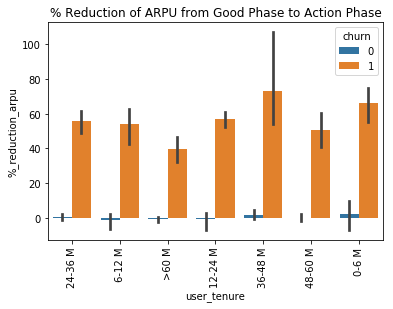

In [70]:
sns.barplot(x='user_tenure', y= '%_reduction_arpu',hue='churn', data= churn_eda)
plt.xticks(rotation=90)
plt.title('% Reduction of ARPU from Good Phase to Action Phase')

#### Average revenue per user reduces significantly by 40-60 % when user moves from good phase to action phase.

In [71]:
def category_plot(per_reduction):
    sns.barplot(x='user_tenure', y= per_reduction ,hue='churn', data= churn_eda)
    plt.xticks(rotation=90)

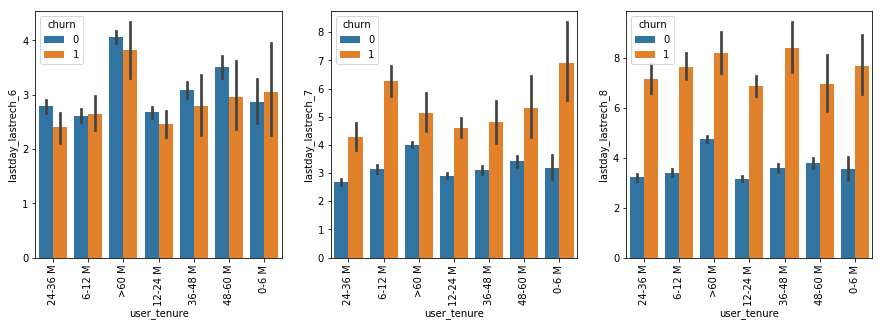

In [72]:
plt.figure(figsize=(15,10))

plt.title('Last day recharge for each month variation on good phase and action phase')

plt.subplot(2,3,1)
category_plot('lastday_lastrech_6')
plt.subplot(2,3,2)
category_plot('lastday_lastrech_7')
plt.subplot(2,3,3)
category_plot('lastday_lastrech_8')


#### For each month the last day the user recharged increases from 2 days to 8 days for the users who churn after action phase.

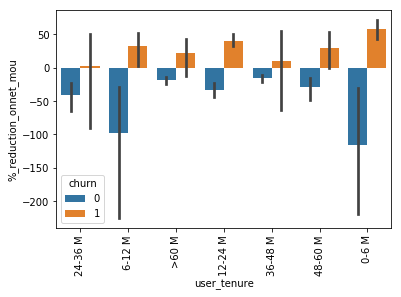

In [73]:
category_plot('%_reduction_onnet_mou')

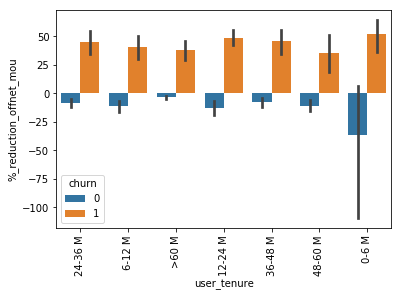

In [74]:
category_plot('%_reduction_offnet_mou')

#### The % reduction in on network calls and off network calls reduce from 30-50 % in action phase.

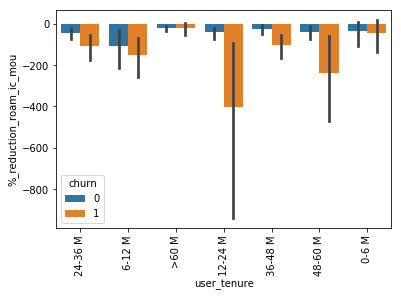

In [75]:
category_plot('%_reduction_roam_ic_mou')

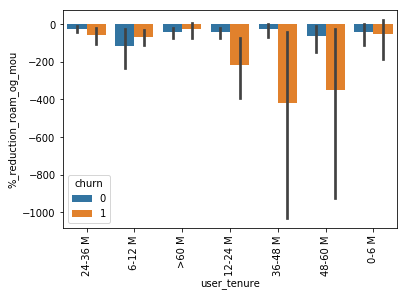

In [76]:
category_plot('%_reduction_roam_og_mou')

#### Roaming calls minutes of usage show that the incoming and outgoing has increased and that may show the the users have changed their location and they are bound to churn.

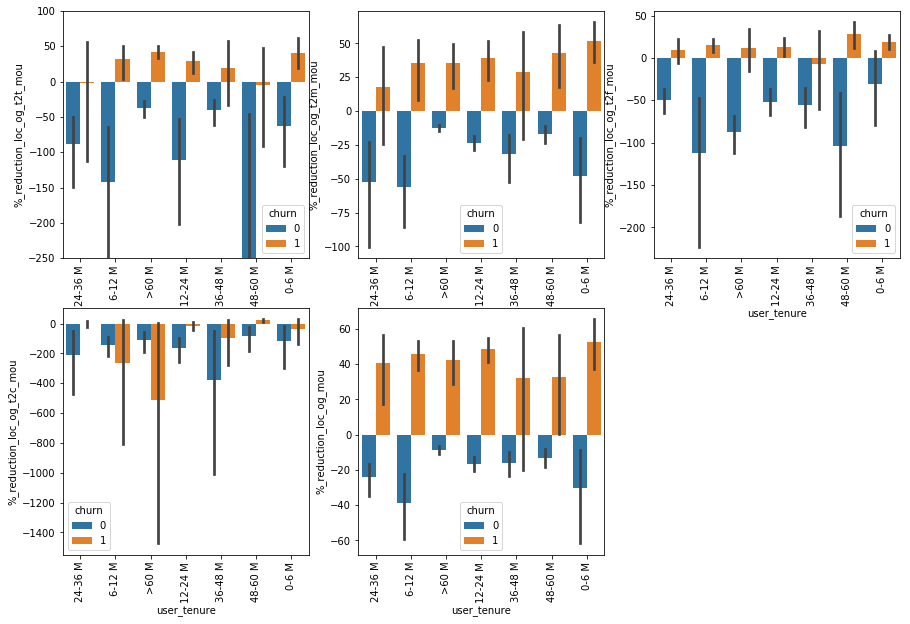

In [77]:
plt.figure(figsize=(15,10))

plt.title('Outgoing Local Calls MOU variation on good phase to action phase')

plt.subplot(2,3,1)
plt.ylim(-250,100)
category_plot('%_reduction_loc_og_t2t_mou')
plt.subplot(2,3,2)
category_plot('%_reduction_loc_og_t2m_mou')
plt.subplot(2,3,3)
category_plot('%_reduction_loc_og_t2f_mou')
plt.subplot(2,3,4)
category_plot('%_reduction_loc_og_t2c_mou')
plt.subplot(2,3,5)
category_plot('%_reduction_loc_og_mou')

#### % reduction in local outgoing minutes of usage is around 30-40% for the users which churn.

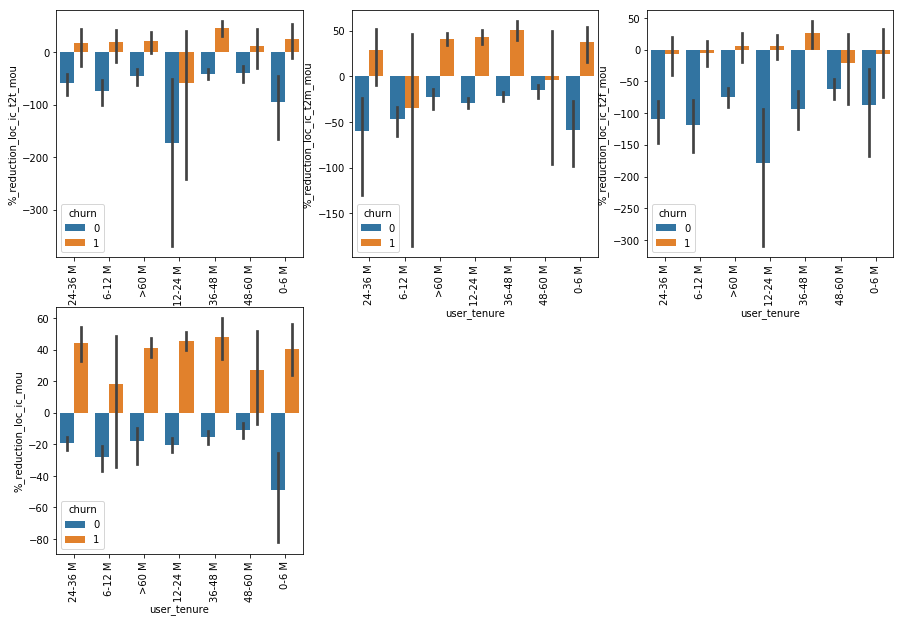

In [78]:
plt.figure(figsize=(15,10))

plt.title('Incoming Local Calls MOU variation on good phase to action phase')

plt.subplot(2,3,1)
category_plot('%_reduction_loc_ic_t2t_mou')
plt.subplot(2,3,2)
category_plot('%_reduction_loc_ic_t2m_mou')
plt.subplot(2,3,3)
category_plot('%_reduction_loc_ic_t2f_mou')
plt.subplot(2,3,4)
category_plot('%_reduction_loc_ic_mou')

#### % reduction in local incoming minutes of usage is around 30-40% for the users which churn.

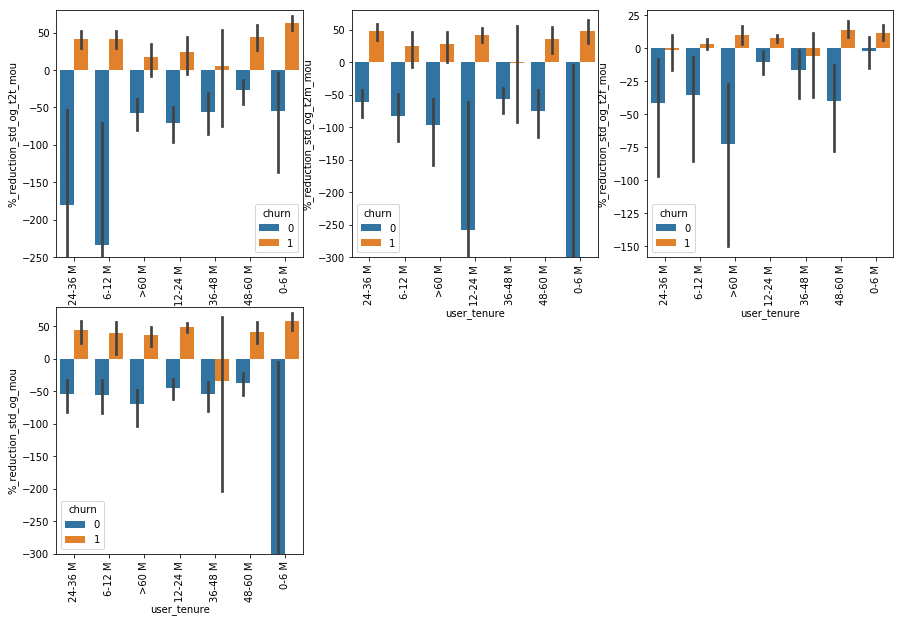

In [79]:
plt.figure(figsize=(15,10))

plt.title('Outgoing STD Calls MOU variation on good phase to action phase')

plt.subplot(2,3,1)
plt.ylim(-250,80)
category_plot('%_reduction_std_og_t2t_mou')
plt.subplot(2,3,2)
plt.ylim(-300,80)
category_plot('%_reduction_std_og_t2m_mou')
plt.subplot(2,3,3)
category_plot('%_reduction_std_og_t2f_mou')
plt.subplot(2,3,4)
plt.ylim(-300,80)
category_plot('%_reduction_std_og_mou')


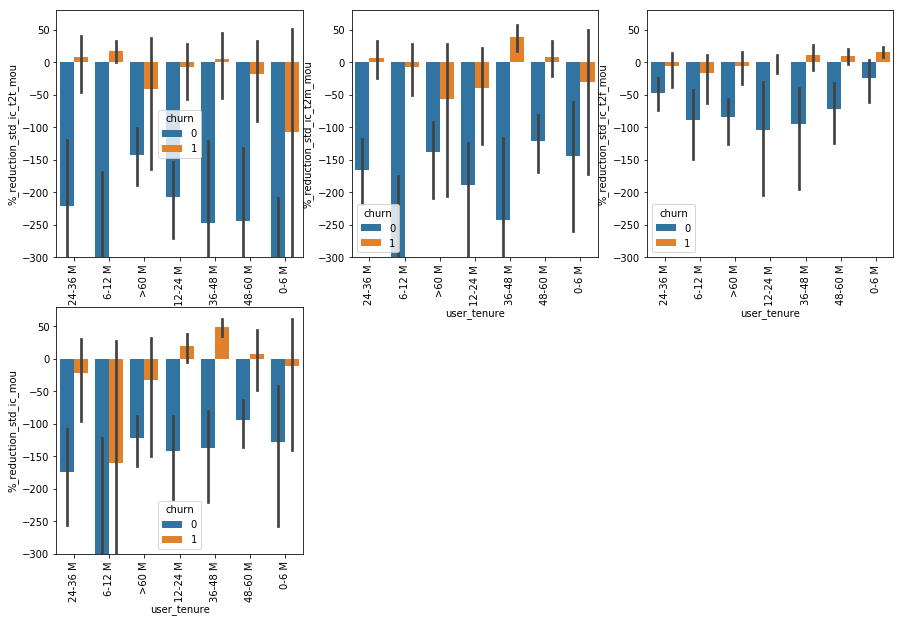

In [80]:
plt.figure(figsize=(15,10))

plt.title('Incoming STD Calls MOU variation on good phase to action phase')

plt.subplot(2,3,1)
plt.ylim(-300,80)
category_plot('%_reduction_std_ic_t2t_mou')
plt.subplot(2,3,2)
plt.ylim(-300,80)
category_plot('%_reduction_std_ic_t2m_mou')
plt.subplot(2,3,3)
plt.ylim(-300,80)
category_plot('%_reduction_std_ic_t2f_mou')
plt.subplot(2,3,4)
plt.ylim(-300,80)
category_plot('%_reduction_std_ic_mou')


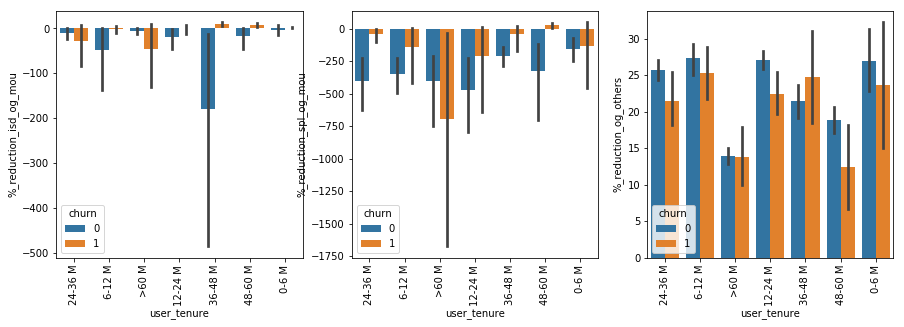

In [81]:
plt.figure(figsize=(15,10))

plt.title('Outgoing ISD and special Calls MOU variation on good phase to action phase')

plt.subplot(2,3,1)
category_plot('%_reduction_isd_og_mou')
plt.subplot(2,3,2)
category_plot('%_reduction_spl_og_mou')
plt.subplot(2,3,3)
category_plot('%_reduction_og_others')



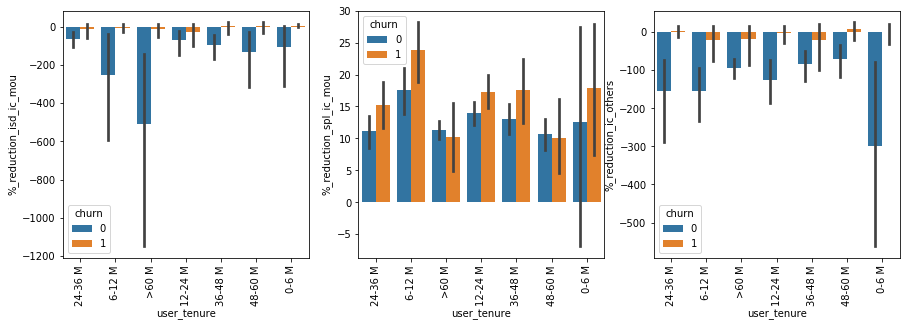

In [82]:
plt.figure(figsize=(15,10))

plt.title('Incoming ISD and special Calls MOU variation on good phase to action phase')

plt.subplot(2,3,1)
category_plot('%_reduction_isd_ic_mou')
plt.subplot(2,3,2)
category_plot('%_reduction_spl_ic_mou')
plt.subplot(2,3,3)
category_plot('%_reduction_ic_others')


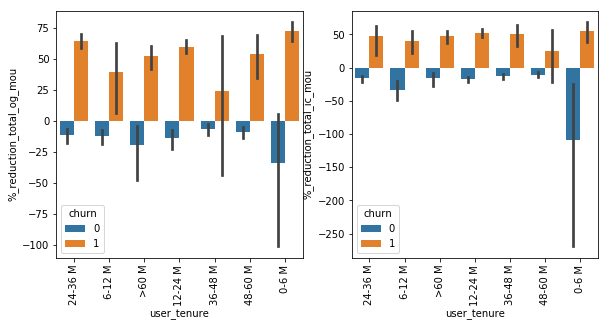

In [83]:
#Total incoming and outgoing calls MOU variation on good phase to action phase
plt.figure(figsize=(15,10))

plt.title('Total incoming and outgoing calls MOU variation on good phase to action phase')

plt.subplot(2,3,1)
category_plot('%_reduction_total_og_mou')
plt.subplot(2,3,2)
category_plot('%_reduction_total_ic_mou')


#### % reduction in outgoing and incoming calls is around 40- 50 % in action phase

In [84]:
churn_eda['%_reduction_total_rech_amt']= churn_eda[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
#churn_eda=churn_eda.drop(['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'], axis=1)

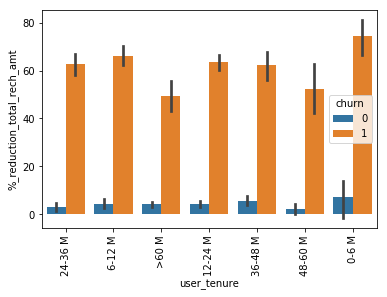

In [85]:
# % reduction in Total recharge amount
category_plot('%_reduction_total_rech_amt')

#### % reduction in recharge amount is around 60 % in action phase.

In [86]:
churn_eda['Tot_2g_rech']= churn_eda['count_rech_2g_6']+ churn_eda['count_rech_2g_7'] + churn_eda['count_rech_2g_8']
churn_eda['Tot_3g_rech']= churn_eda['count_rech_3g_6']+ churn_eda['count_rech_3g_7'] + churn_eda['count_rech_3g_8']

##### If the total count of recaharge for 2G network is more than the recharge of 3G network, we can say the user is primarily using 2G network.

In [87]:
# Labelling User as 2G or 3G based on the usage.
churn_eda['network_user']= churn_eda[['Tot_2g_rech','Tot_3g_rech']].apply(lambda x: '3G' if x[0] < x[1] else '2G', axis=1)

In [88]:
churn_eda=churn_eda.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','Tot_2g_rech','Tot_3g_rech'], axis=1)

In [89]:
churn_eda.network_user.value_counts()

2G    25311
3G     4415
Name: network_user, dtype: int64

In [90]:
def network_plot(param):
    sns.barplot(x='network_user', y= param ,hue='churn', data= churn_eda)
    plt.xticks(rotation=90)

Text(0.5,1,'Average recharge amount data for 2G and 3G network')

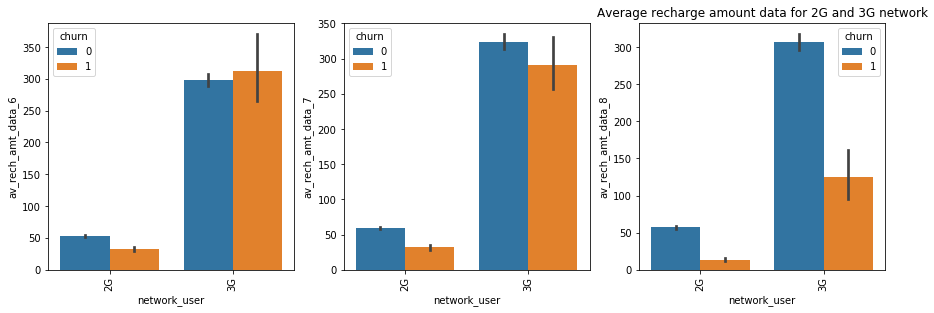

In [91]:
plt.figure(figsize=(15,10))



plt.subplot(2,3,1)
network_plot('av_rech_amt_data_6')
plt.subplot(2,3,2)
network_plot('av_rech_amt_data_7')
plt.subplot(2,3,3)
network_plot('av_rech_amt_data_8')

plt.title('Average recharge amount data for 2G and 3G network',loc='center')


In [92]:
churn_eda['%_av_rech_amt_data']= churn_eda[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)

In [93]:
churn_eda=churn_eda.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'], axis=1)

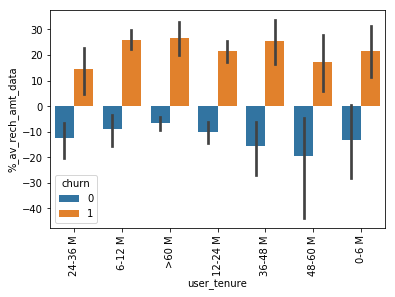

In [94]:
# % reduction in Total recharge amount
category_plot('%_av_rech_amt_data')

#### Thus we see that Major data users are of 3G network and the average amount for data recharge is always more than 2G. Also, in action phase the average amount for data recharge reduces by 25-30%.

Text(0.5,1,'Total recharge amount for 2G and 3G network')

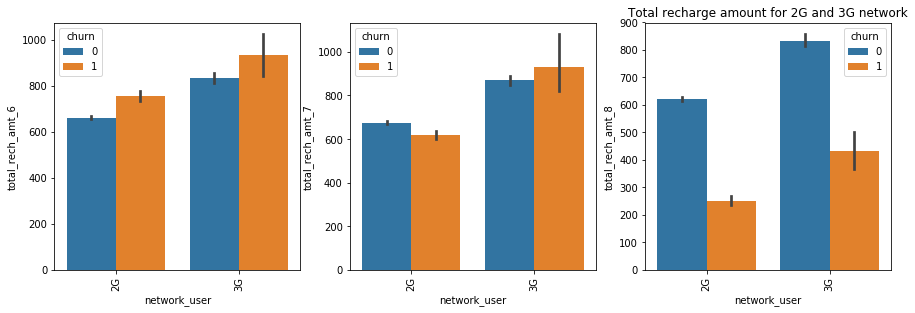

In [95]:
plt.figure(figsize=(15,10))



plt.subplot(2,3,1)
network_plot('total_rech_amt_6')
plt.subplot(2,3,2)
network_plot('total_rech_amt_7')
plt.subplot(2,3,3)
network_plot('total_rech_amt_8')

plt.title('Total recharge amount for 2G and 3G network')


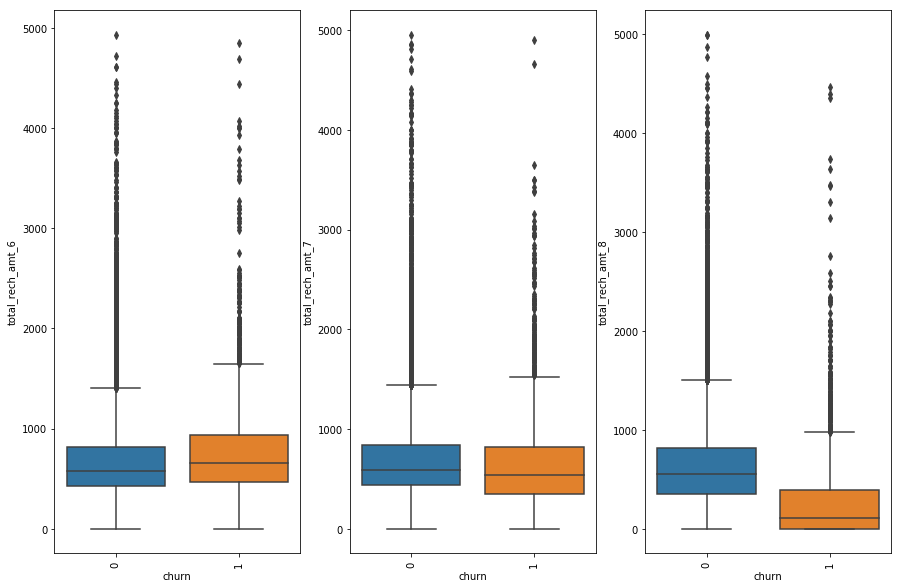

In [96]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.xticks(rotation=90)
sns.boxplot(x='churn', y= 'total_rech_amt_6', data= churn_eda[churn_eda.total_rech_amt_6 <5000])
plt.subplot(1,3,2)
plt.xticks(rotation=90)
sns.boxplot(x='churn', y= 'total_rech_amt_7', data= churn_eda[churn_eda.total_rech_amt_7 <5000])
plt.subplot(1,3,3)
plt.xticks(rotation=90)
sns.boxplot(x='churn', y= 'total_rech_amt_8', data= churn_eda[churn_eda.total_rech_amt_8 <5000])

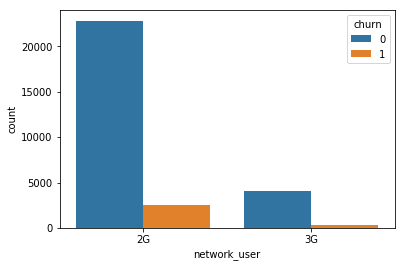

In [97]:
sns.countplot(x='network_user', hue='churn', data=churn_eda)

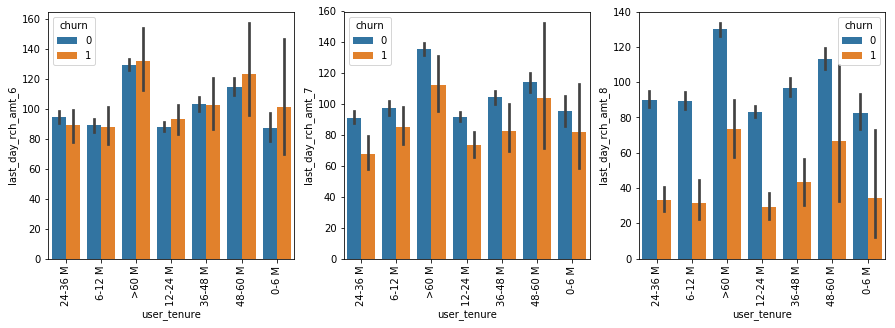

In [98]:
plt.figure(figsize=(15,10))

plt.title('Last day recharge variation on good phase to action phase')

plt.subplot(2,3,1)
category_plot('last_day_rch_amt_6')
plt.subplot(2,3,2)
category_plot('last_day_rch_amt_7')
plt.subplot(2,3,3)
category_plot('last_day_rch_amt_8')

In [99]:
churn_eda['%_last_day_rch_amt']= churn_eda[['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda=churn_eda.drop(['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'], axis=1)



Text(0.5,1,'% reduction in last day recharge amount')

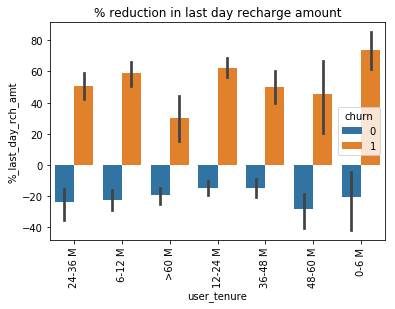

In [100]:
# % reduction in last day recharge amount
category_plot('%_last_day_rch_amt')
plt.title ('% reduction in last day recharge amount')

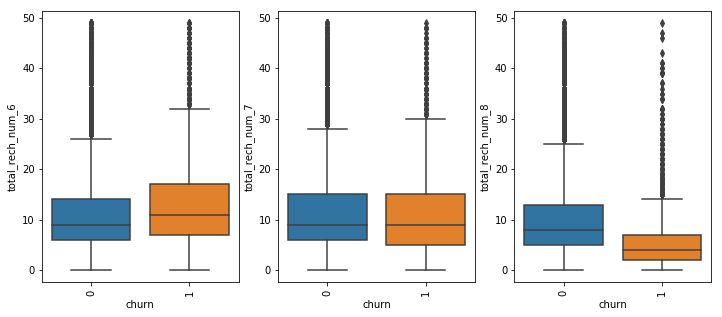

In [101]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.xticks(rotation=90)
sns.boxplot(x='churn', y= 'total_rech_num_6', data= churn_eda[churn_eda.total_rech_num_6 <50])
plt.subplot(1,3,2)
plt.xticks(rotation=90)
sns.boxplot(x='churn', y= 'total_rech_num_7', data= churn_eda[churn_eda.total_rech_num_7 <50])
plt.subplot(1,3,3)
plt.xticks(rotation=90)
sns.boxplot(x='churn', y= 'total_rech_num_8', data= churn_eda[churn_eda.total_rech_num_8 <50])

In [102]:
churn_eda['%_red_total_rech_num']= churn_eda[['total_rech_num_6','total_rech_num_7','total_rech_num_8']].apply(lambda x: percent_reduction(x[0],x[1],x[2]) ,axis=1)
churn_eda=churn_eda.drop(['total_rech_num_6','total_rech_num_7','total_rech_num_8'], axis=1)



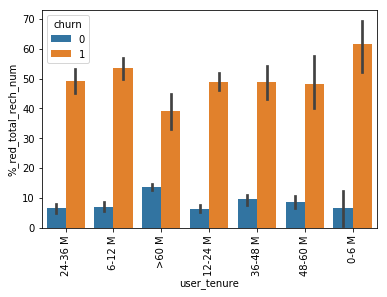

In [103]:
# % reduction in Total recharge number
category_plot('%_red_total_rech_num')

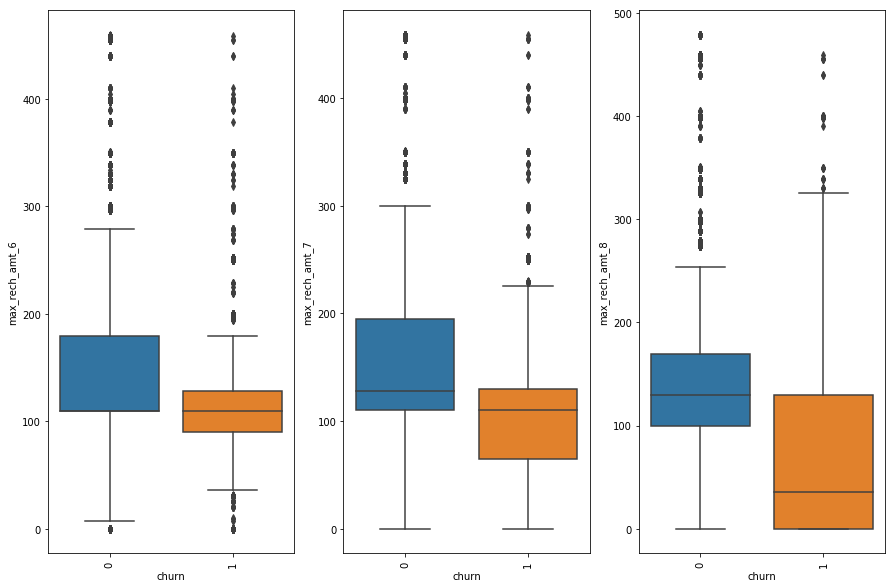

In [104]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.xticks(rotation=90)
sns.boxplot(x='churn', y= 'max_rech_amt_6', data= churn_eda[churn_eda.max_rech_amt_6 <500])
plt.subplot(1,3,2)
plt.xticks(rotation=90)
sns.boxplot(x='churn', y= 'max_rech_amt_7', data= churn_eda[churn_eda.max_rech_amt_7 <500])
plt.subplot(1,3,3)
plt.xticks(rotation=90)
sns.boxplot(x='churn', y= 'max_rech_amt_8', data= churn_eda[churn_eda.max_rech_amt_8 <500])

In [105]:
churn_eda['Voice_usage_local']= (churn_eda['loc_og_mou_6']+churn_eda['loc_og_mou_7']+ churn_eda['loc_og_mou_8'])/3
churn_eda['Voice_usage_std']=(churn_eda['std_og_mou_6']+churn_eda['std_og_mou_7'] +churn_eda['std_og_mou_8'])/3

In [106]:
churn_eda['voice_usage']=churn_eda[['Voice_usage_local','Voice_usage_std']].apply(lambda x:  'local' if x[0]> x[1] else 'std', axis=1)

In [107]:
churn_eda=churn_eda.drop(['loc_og_mou_6','std_og_mou_6','loc_og_mou_7','std_og_mou_7','std_og_mou_8','loc_og_mou_8'], axis=1)

In [108]:
churn_eda['voice_usage'].value_counts()

local    14956
std      14770
Name: voice_usage, dtype: int64

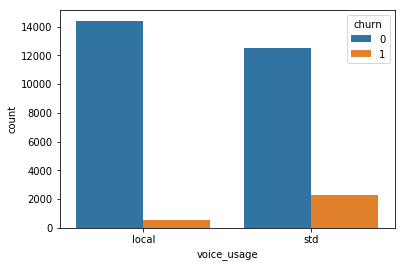

In [109]:
sns.countplot(x='voice_usage', hue='churn', data=churn_eda)

#### STD users churn more than local users.

In [110]:
#churn_eda.to_csv('E:\PGDMLAI\Assignments\Telephone churn case study\model_telecom_churn_data.csv')

In [111]:
churn_eda=churn_eda.drop(['Voice_usage_local','Voice_usage_std'], axis=1)

In [112]:
churn_eda=churn_eda.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)


In [113]:
churn_eda=churn_eda.drop(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'], axis=1)

In [114]:
churn_eda.shape

(29726, 88)

In [115]:
churn_eda.columns

Index(['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_rch_amt', 'churn',
       '%_reduction_arpu', '%_reduction_onnet_mou', '%_reduction_offnet_mou',
       '%_reduction_roam_ic_mou', '%_reduction_roam_og_mou',
       '%_red

In [116]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = churn_eda.select_dtypes(include=['object'])
df_categorical.head()

churn user_tenure network_user voice_usage
7      1     24-36 M           2G       local
8      0      6-12 M           2G       local
13     0       >60 M           2G         std
16     0     12-24 M           2G       local
17     0     12-24 M           2G         std

In [117]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

churn  user_tenure  network_user  voice_usage
7       1            2             0            0
8       0            5             0            0
13      0            6             0            1
16      0            1             0            0
17      0            1             0            1

In [118]:
# concat df_categorical with original df
churn_eda = churn_eda.drop(df_categorical.columns, axis=1)
churn_eda = pd.concat([churn_eda, df_categorical], axis=1)
churn_eda.head()

max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  \
7             1580             790            1580                0.0   
8               90             154              30                0.0   
13             110             110             130                0.0   
16             110             110             130                0.0   
17             110               0              30                0.0   

    total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  \
7                 0.0                0.0              0.0              0.0   
8                 2.0                3.0              0.0            154.0   
13                0.0                3.0              0.0              0.0   
16                0.0                0.0              0.0              0.0   
17                0.0                0.0              0.0              0.0   

    max_rech_data_8  count_rech_3g_6     ...       lastday_lastrech_7  \
7               0.0              0.0     ...                      6.0   
8              23.0              0.0     ...                      0.0   
13             23.0              0.0     ...                      9.0   
16              0.0              0.0     ...                      0.0   
17              0.0              0.0     ...                      1.0   

    lastday_lastrech_8  %_reduction_total_rech_amt  %_av_rech_amt_data  \
7                  5.0                      -207.0                 0.0   
8                  1.0                        77.0                22.0   
13                 1.0                       -89.0                 0.0   
16                17.0                        65.0                 0.0   
17                 6.0                        93.0                 0.0   

    %_last_day_rch_amt  %_red_total_rech_num  churn  user_tenure  \
7                  0.0                 -40.0      1            2   
8                 60.0                  30.0      0            5   
13               100.0                -120.0      0            6   
16               -30.0                  75.0      0            1   
17               100.0                  62.0      0            1   

    network_user  voice_usage  
7              0            0  
8              0            0  
13             0            1  
16             0            0  
17             0            1  

[5 rows x 88 columns]

In [119]:
len(churn_eda[churn_eda.isnull().sum(axis=1) >0].index)

1239

In [120]:
churn_eda= churn_eda[churn_eda.isnull().sum(axis=1) ==0]

In [121]:
churn_eda.churn.value_counts()

0    26389
1     2098
Name: churn, dtype: int64

In [122]:
from  sklearn.utils import resample
# Separate majority and minority classes
df_majority =churn_eda[churn_eda.churn==0]
df_minority = churn_eda[churn_eda.churn==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=churn_eda.churn.value_counts()[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.churn.value_counts()

1    26389
0    26389
Name: churn, dtype: int64

In [123]:
# Putting feature variable to X
X = df_upsampled.drop('churn',axis=1)
#X = churn_eda.drop('churn',axis=1)

# Putting response variable to y
y = df_upsampled['churn']
#y = churn_eda['churn']


In [124]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)


In [125]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [126]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.80      0.83      0.81      7909
          1       0.82      0.79      0.81      7925

avg / total       0.81      0.81      0.81     15834



In [127]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.80      0.83      0.81      7909
          1       0.82      0.79      0.81      7925

avg / total       0.81      0.81      0.81     15834



In [128]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6571 1338]
 [1658 6267]]
0.8107869142351901


In [129]:
# Predicted     not_Churn  churn  __all__
# Actual
# not_Churn     6571    1338     7909
# churn        1658    6267     7925
# __all__          8229    7605     15834

In [130]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot, graphviz

# Putting features
features = list(X_train.columns[0:])
features

['max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g',
 'avg_rch_amt',
 '%_reduction_arpu',
 '%_reduction_onnet_mou',
 '%_reduction_offnet_mou',
 '%_reduction_roam_ic_mou',
 '%_reduction_roam_og_mou',
 '%_reduction_loc_og_t2t_mou',
 '%_reduction_loc_og_t2m_mou',
 '%_re

In [132]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

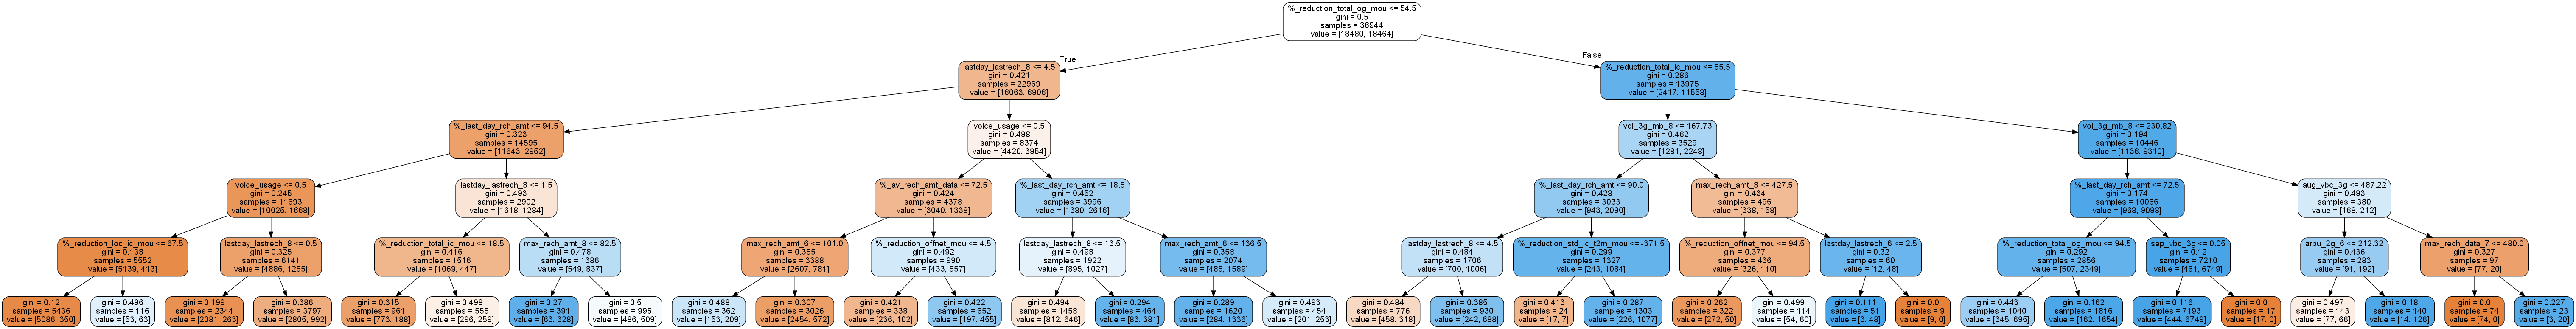

In [133]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

### Hyper parameter tuning

#### Tuning max depth

In [134]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [135]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.133717         0.009395         0.747645          0.747645   
1       0.184486         0.008196         0.747645          0.747645   
2       0.273433         0.007796         0.784187          0.784546   
3       0.376033         0.008595         0.799805          0.800773   
4       0.426995         0.007996         0.809631          0.814659   

  param_max_depth            params  rank_test_score  split0_test_score  \
0               1  {'max_depth': 1}               38           0.746515   
1               2  {'max_depth': 2}               38           0.746515   
2               3  {'max_depth': 3}               37           0.780891   
3               4  {'max_depth': 4}               36           0.798620   
4               5  {'max_depth': 5}               35           0.809988   

   split0_train_score  split1_test_score       ...         split2_test_score  \
0            0.747928           0.747598       ...                  0.750440   
1            0.747928           0.747598       ...                  0.750440   
2            0.782203           0.779808       ...                  0.786439   
3            0.802199           0.795778       ...                  0.796996   
4            0.813433           0.803627       ...                  0.809040   

   split2_train_score  split3_test_score  split3_train_score  \
0            0.746946           0.750169            0.747014   
1            0.746946           0.750169            0.747014   
2            0.785857           0.789823            0.785011   
3            0.799323           0.805928            0.798105   
4            0.813331           0.815672            0.816613   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0           0.743503            0.748680      0.005976    1.495631e-03   
1           0.743503            0.748680      0.005312    1.468919e-03   
2           0.783974            0.787217      0.023348    7.480743e-04   
3           0.801705            0.800480      0.026836    2.243711e-03   
4           0.809827            0.816450      0.008300    8.395585e-07   

   std_test_score  std_train_score  
0        0.002554         0.000638  
1        0.002554         0.000638  
2        0.003659         0.001949  
3        0.003650         0.002012  
4        0.003822         0.001531  

[5 rows x 21 columns]

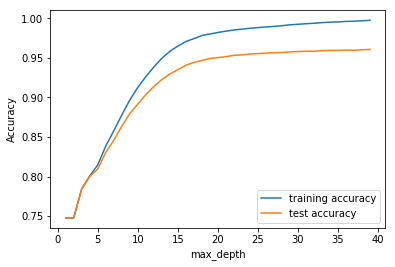

In [136]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


We can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds. 

#### Tuning minimum sample leaf 

In [137]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [138]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       1.240590         0.009595         0.936147          0.974475   
1       1.021494         0.008596         0.881334          0.907597   
2       0.888859         0.009195         0.861683          0.881097   
3       0.836755         0.008595         0.847634          0.864809   
4       0.960043         0.010370         0.839757          0.852973   

  param_min_samples_leaf                    params  rank_test_score  \
0                      5   {'min_samples_leaf': 5}                1   
1                     25  {'min_samples_leaf': 25}                2   
2                     45  {'min_samples_leaf': 45}                3   
3                     65  {'min_samples_leaf': 65}                4   
4                     85  {'min_samples_leaf': 85}                5   

   split0_test_score  split0_train_score  split1_test_score       ...         \
0           0.936392            0.973676           0.940452       ...          
1           0.882663            0.906987           0.883611       ...          
2           0.856814            0.879276           0.858168       ...          
3           0.847476            0.865234           0.843010       ...          
4           0.840709            0.856031           0.835296       ...          

   split2_test_score  split2_train_score  split3_test_score  \
0           0.936257            0.973507           0.936663   
1           0.882257            0.907495           0.878603   
2           0.863581            0.884148           0.867506   
3           0.851130            0.865877           0.849912   
4           0.840574            0.853392           0.840438   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.976045           0.930969            0.974015      0.094633   
1            0.909626           0.879534            0.910103      0.102455   
2            0.884284           0.862344            0.880701      0.047232   
3            0.866249           0.846643            0.863547      0.067993   
4            0.850753           0.841770            0.855393      0.179991   

   std_score_time  std_test_score  std_train_score  
0        0.001854        0.003023         0.000968  
1        0.000800        0.001923         0.002254  
2        0.002399        0.003847         0.002796  
3        0.001020        0.002821         0.001248  
4        0.002029        0.002280         0.002601  

[5 rows x 21 columns]

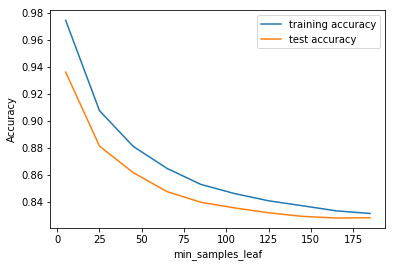

In [139]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

#### Tuning Min samples split

In [140]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [141]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       1.579139         0.009795         0.961130          0.999635   
1       1.601478         0.010993         0.942345          0.980721   
2       1.406370         0.008595         0.924697          0.961611   
3       1.492485         0.010394         0.911569          0.944734   
4       1.391531         0.008596         0.901039          0.931667   

  param_min_samples_split                     params  rank_test_score  \
0                       5   {'min_samples_split': 5}                1   
1                      25  {'min_samples_split': 25}                2   
2                      45  {'min_samples_split': 45}                3   
3                      65  {'min_samples_split': 65}                4   
4                      85  {'min_samples_split': 85}                5   

   split0_test_score  split0_train_score  split1_test_score       ...         \
0           0.960482            0.999560           0.968061       ...          
1           0.942211            0.980003           0.946813       ...          
2           0.923806            0.962984           0.926242       ...          
3           0.915415            0.949349           0.912708       ...          
4           0.903505            0.933852           0.902423       ...          

   split2_test_score  split2_train_score  split3_test_score  \
0           0.960346            0.999763           0.961564   
1           0.941129            0.980917           0.942617   
2           0.924753            0.963221           0.926242   
3           0.908107            0.942954           0.914738   
4           0.902152            0.933581           0.902964   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.999560           0.955198            0.999526      0.122240   
1            0.980748           0.938955            0.981459      0.300207   
2            0.961123           0.922442            0.960786      0.079618   
3            0.943292           0.906876            0.941569      0.188249   
4            0.929589           0.894153            0.928306      0.065524   

   std_score_time  std_test_score  std_train_score  
0        0.001719        0.004110         0.000106  
1        0.001672        0.002570         0.000481  
2        0.000489        0.001460         0.001280  
3        0.002496        0.003468         0.002818  
4        0.000799        0.003474         0.002274  

[5 rows x 21 columns]

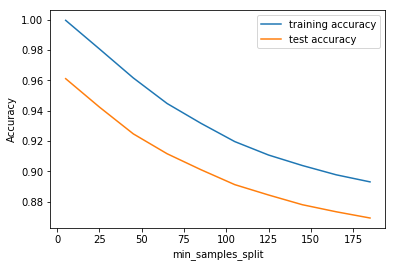

In [142]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

###  Grid Search to Find Optimal Hyperparameters

In [143]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 125, 50),
    'min_samples_split': range(50, 175, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 125, 50), 'min_samples_split': range(50, 175, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [144]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.538536         0.008595         0.807926          0.811992   
1        0.462457         0.007795         0.808007          0.811992   
2        0.494240         0.007995         0.807005          0.811072   
3        0.459383         0.006997         0.807113          0.810571   
4        0.529997         0.007977         0.807113          0.810571   
5        0.458710         0.007597         0.807113          0.810571   
6        0.863453         0.009195         0.853400          0.867529   
7        0.867467         0.008796         0.853427          0.867529   
8        1.075940         0.010393         0.846254          0.860762   
9        0.893964         0.010993         0.838566          0.848663   
10       0.828444         0.007998         0.838566          0.848663   
11       0.899421         0.008796         0.838566          0.848663   
12       0.403541         0.007795         0.808738          0.812967   
13       0.435069         0.008395         0.808738          0.812967   
14       0.424578         0.009194         0.808602          0.812859   
15       0.394965         0.008595         0.806951          0.811959   
16       0.431135         0.007395         0.806951          0.811959   
17       0.397157         0.007395         0.806951          0.811959   
18       0.782591         0.009195         0.851722          0.866609   
19       0.731149         0.007596         0.851694          0.866609   
20       0.696175         0.008995         0.846660          0.860451   
21       0.768896         0.010395         0.834154          0.846233   
22       0.743635         0.008395         0.834154          0.846233   
23       0.696977         0.007796         0.834154          0.846233   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                     50   
3          entropy               5                    100   
4          entropy               5                    100   
5          entropy               5                    100   
6          entropy              10                     50   
7          entropy              10                     50   
8          entropy              10                     50   
9          entropy              10                    100   
10         entropy              10                    100   
11         entropy              10                    100   
12            gini               5                     50   
13            gini               5                     50   
14            gini               5                     50   
15            gini               5                    100   
16            gini               5                    100   
17            gini               5                    100   
18            gini              10                     50   
19            gini              10                     50   
20            gini              10                     50   
21            gini              10                    100   
22            gini              10                    100   
23            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                      150  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
5                      150  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7   

In [145]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8534268081420529
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [146]:
# Running the model with Optimized parameters

# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [147]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8641530882910193

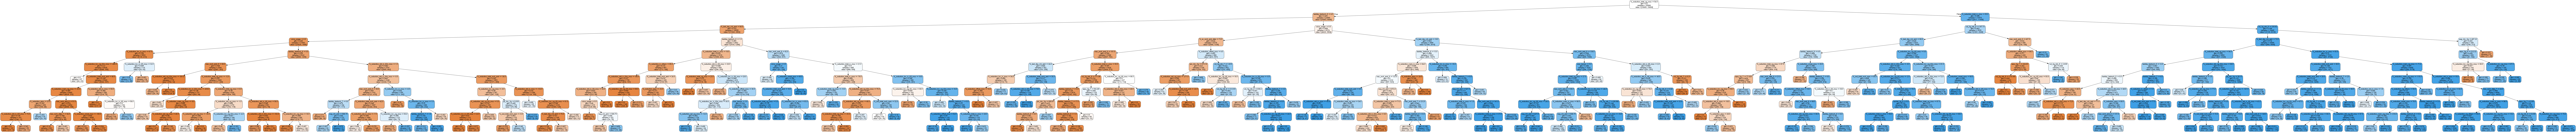

In [148]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [149]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.7915877226222053


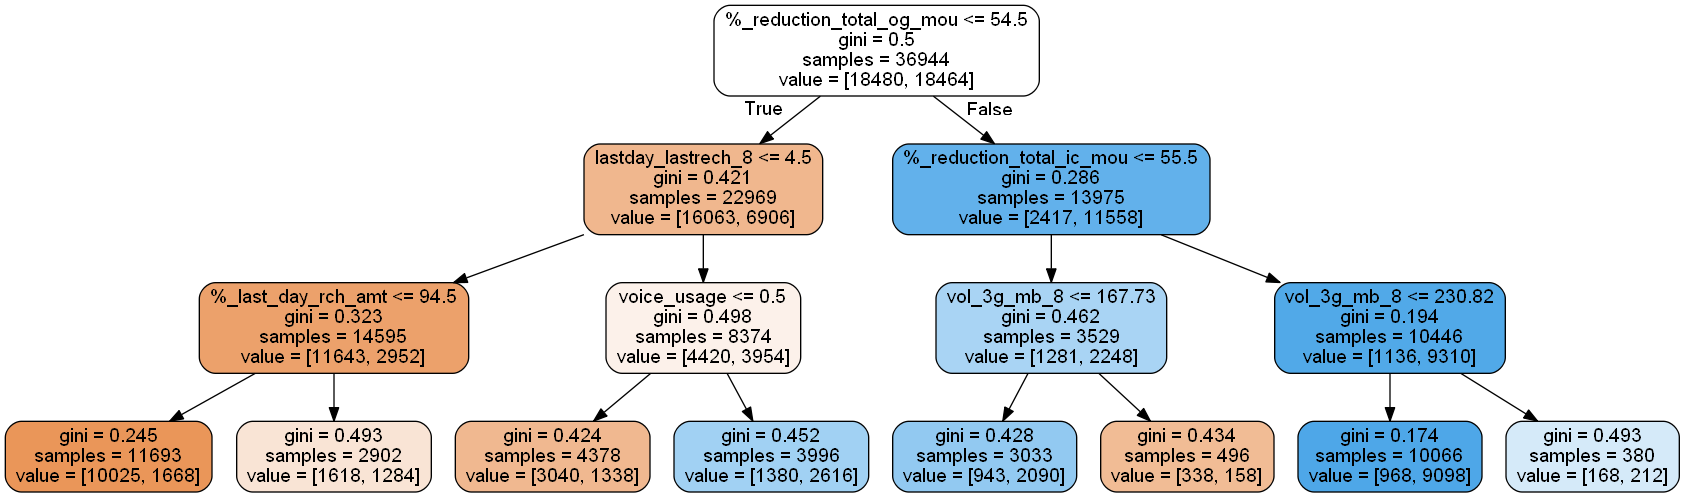

In [150]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())    

In [151]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.82      0.80      7909
          1       0.81      0.77      0.79      7925

avg / total       0.79      0.79      0.79     15834



In [152]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6468 1441]
 [1859 6066]]


In [153]:
# How's our accuracy?
print( accuracy_score(y_test,y_pred) )

0.7915877226222053


In [154]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [155]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [156]:
# Making predictions
predictions = rfc.predict(X_test)

In [157]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99      7909
          1       0.98      1.00      0.99      7925

avg / total       0.99      0.99      0.99     15834



### PCA on the data

#### Handling Class imbalance by upscaling the minority variable

In [158]:
from  sklearn.utils import resample
# Separate majority and minority classes
df_majority =churn_eda[churn_eda.churn==0]
df_minority = churn_eda[churn_eda.churn==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=churn_eda.churn.value_counts()[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.churn.value_counts()

1    26389
0    26389
Name: churn, dtype: int64

In [159]:
# Putting feature variable to X
X = df_upsampled.drop('churn',axis=1)
#X = churn_eda.drop('churn',axis=1)

# Putting response variable to y
y = df_upsampled['churn']
#y = churn_eda['churn']

In [160]:
X=(X-X.mean())/X.std()

X.head()

max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  \
8        -0.413508       -0.057468       -0.640233          -0.399688   
13       -0.297007       -0.302408       -0.071323          -0.399688   
16       -0.297007       -0.302408       -0.071323          -0.399688   
17       -0.297007       -0.914758       -0.640233          -0.399688   
21       -0.646510       -0.636417       -0.526451          -0.399688   

    total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  \
8            0.429377           1.057685        -0.501933         1.038773   
13          -0.402228           1.057685        -0.501933        -0.485021   
16          -0.402228          -0.385565        -0.501933        -0.485021   
17          -0.402228          -0.385565        -0.501933        -0.485021   
21          -0.402228          -0.385565        -0.501933        -0.485021   

    max_rech_data_8  count_rech_3g_6     ...       lastday_lastrech_6  \
8         -0.188649        -0.269157     ...                 0.567431   
13        -0.188649        -0.269157     ...                 1.857819   
16        -0.447876        -0.269157     ...                -0.722958   
17        -0.447876        -0.269157     ...                -0.722958   
21        -0.447876        -0.269157     ...                -0.722958   

    lastday_lastrech_7  lastday_lastrech_8  %_reduction_total_rech_amt  \
8            -0.789238           -0.750225                    0.872072   
13            1.228587           -0.750225                   -2.051239   
16           -0.789238            1.953522                    0.660748   
17           -0.565036            0.094696                    1.153837   
21           -0.789238           -0.919209                   -0.695245   

    %_av_rech_amt_data  %_last_day_rch_amt  %_red_total_rech_num  user_tenure  \
8             0.117401            0.268767              0.111317     0.892548   
13           -0.017456            0.488133             -3.021249     1.393137   
16           -0.017456           -0.224807              1.051087    -1.109807   
17           -0.017456            0.488133              0.779598    -1.109807   
21           -0.017456           -0.608698             -0.765801    -1.109807   

    network_user  voice_usage  
8      -0.383075    -1.245783  
13     -0.383075     0.802693  
16     -0.383075    -1.245783  
17     -0.383075     0.802693  
21     -0.383075     0.802693  

[5 rows x 87 columns]

In [161]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)


In [162]:
X_train.shape

(36944, 87)

In [163]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [164]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [165]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

Feature       PC1       PC2
0     max_rech_amt_6  0.069591 -0.109727
1     max_rech_amt_7  0.070872 -0.106811
2     max_rech_amt_8  0.080980 -0.102437
3  total_rech_data_6  0.135945  0.246940
4  total_rech_data_7  0.135597  0.259703

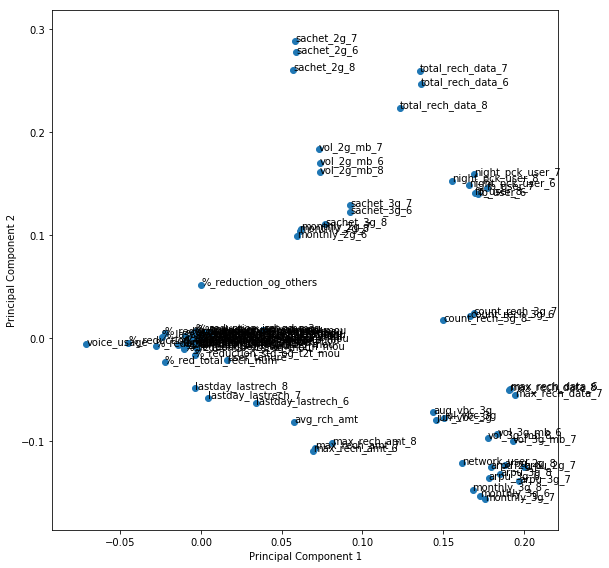

In [166]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

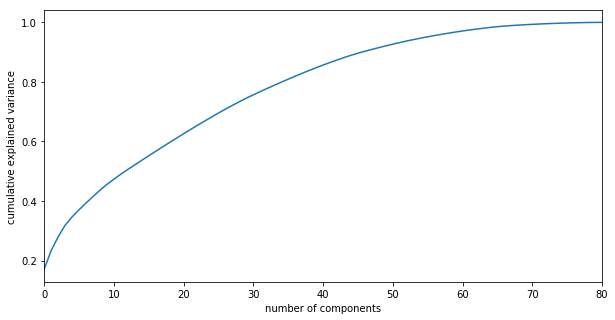

In [167]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,80)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 50 components are needed to describe 90% of the variance in the dataset
- We'll choose 50 components for our modeling

In [168]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [169]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(36944, 50)

In [170]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([17.02, 23.26, 27.89, 31.8 , 34.62, 37.02, 39.26, 41.45, 43.57,
       45.53, 47.28, 48.98, 50.56, 52.1 , 53.63, 55.15, 56.67, 58.16,
       59.65, 61.11, 62.56, 63.99, 65.41, 66.79, 68.17, 69.51, 70.85,
       72.11, 73.33, 74.54, 75.65, 76.73, 77.81, 78.86, 79.89, 80.91,
       81.91, 82.88, 83.83, 84.76, 85.66, 86.52, 87.35, 88.16, 88.93,
       89.64, 90.3 , 90.91, 91.51, 92.11, 92.66, 93.2 , 93.74, 94.22,
       94.69, 95.13, 95.56, 95.97, 96.36, 96.74, 97.1 , 97.42, 97.72,
       98.01, 98.3 , 98.53, 98.73, 98.9 , 99.06, 99.2 , 99.32, 99.43,
       99.54, 99.63, 99.71, 99.78, 99.85, 99.9 , 99.94, 99.97, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99])

In [171]:
pcs_df.sort_values(by= ['PC1'], ascending = False).head(50)

Feature       PC1       PC2
22           arpu_2g_7  0.200153 -0.125567
19           arpu_3g_7  0.197138 -0.139253
7      max_rech_data_7  0.194412 -0.055860
16         vol_3g_mb_7  0.193027 -0.100259
6      max_rech_data_6  0.191180 -0.049269
8      max_rech_data_8  0.190997 -0.050357
23           arpu_2g_8  0.188014 -0.123599
20           arpu_3g_8  0.185400 -0.132344
15         vol_3g_mb_6  0.183552 -0.093871
21           arpu_2g_6  0.179388 -0.125775
18           arpu_3g_6  0.178146 -0.136334
17         vol_3g_mb_8  0.177641 -0.096964
40           fb_user_7  0.176887  0.145406
34        monthly_3g_7  0.175736 -0.156730
33        monthly_3g_6  0.172564 -0.153542
39           fb_user_6  0.171732  0.139666
41           fb_user_8  0.169709  0.140712
25    night_pck_user_7  0.169308  0.158844
10     count_rech_3g_7  0.168987  0.024345
35        monthly_3g_8  0.168120 -0.147693
9      count_rech_3g_6  0.166798  0.020806
24    night_pck_user_6  0.166017  0.148424
85        network_user  0.161775 -0.121964
26    night_pck_user_8  0.155503  0.152692
43          jul_vbc_3g  0.150626 -0.077514
11     count_rech_3g_8  0.149888  0.017475
44          jun_vbc_3g  0.145462 -0.079551
42          aug_vbc_3g  0.143795 -0.072489
3    total_rech_data_6  0.135945  0.246940
4    total_rech_data_7  0.135597  0.259703
5    total_rech_data_8  0.123224  0.223764
37         sachet_3g_7  0.092333  0.128791
36         sachet_3g_6  0.092287  0.121952
2       max_rech_amt_8  0.080980 -0.102437
38         sachet_3g_8  0.077074  0.110636
14         vol_2g_mb_8  0.073526  0.161142
12         vol_2g_mb_6  0.073395  0.169940
13         vol_2g_mb_7  0.072900  0.183124
1       max_rech_amt_7  0.070872 -0.106811
0       max_rech_amt_6  0.069591 -0.109727
28        monthly_2g_7  0.062150  0.106115
29        monthly_2g_8  0.061068  0.104226
27        monthly_2g_6  0.059372  0.098593
30         sachet_2g_6  0.059075  0.278036
31         sachet_2g_7  0.058389  0.288949
46         avg_rch_amt  0.057617 -0.081427
32         sachet_2g_8  0.057278  0.260754
45          sep_vbc_3g  0.038405  0.007182
77  lastday_lastrech_6  0.033852 -0.063552
84         user_tenure  0.016070 -0.021986

In [172]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

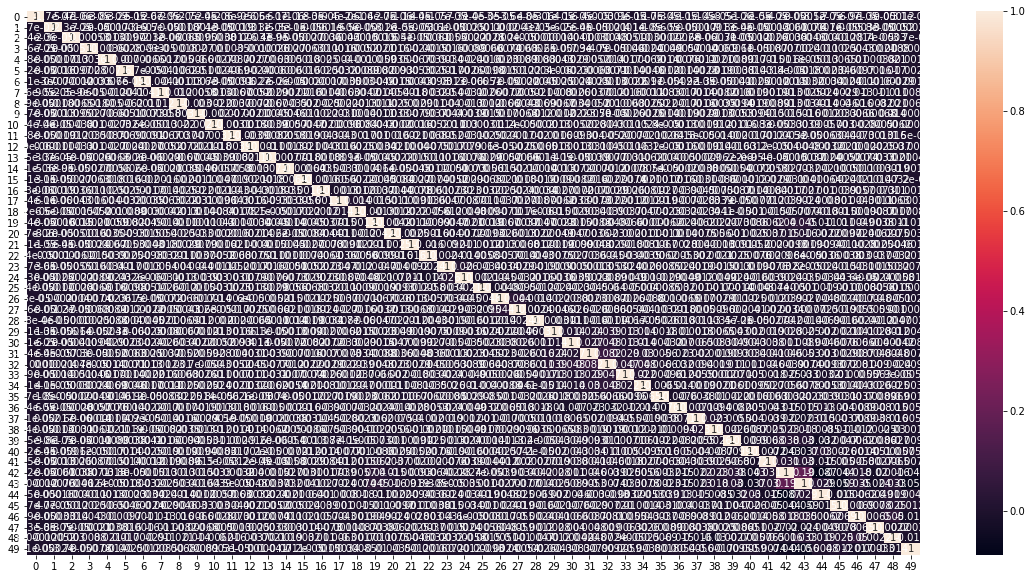

In [173]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [174]:
#Applying selected components to the test data - 50 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(15834, 50)

In [175]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [176]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.85'

In [177]:
pca_last = PCA(n_components=18)
df_train_pca5 = pca_last.fit_transform(X_train)
df_test_pca5 = pca_last.transform(X_test)
df_test_pca5.shape

(15834, 18)

In [178]:
#training the regression model
learner_pca5 = LogisticRegression()
model_pca5 = learner_pca5.fit(df_train_pca5,y_train)
#Making prediction on the test data
pred_probs_test5 = model_pca5.predict_proba(df_test_pca5)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test5))

'0.82'

#### Thus with 18 principal components, we can predict 82% of accuracy

### Logistic regression to identify important variables

In [179]:
import statsmodels.api as sm

In [180]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                36944
Model:                            GLM   Df Residuals:                    36862
Model Family:                Binomial   Df Model:                           81
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -18041.
Date:                Sun, 26 Aug 2018   Deviance:                       36081.
Time:                        19:29:57   Pearson chi2:                 2.05e+05
No. Iterations:                     8                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.1331      0.015     -8.675      0.000      -0.163      -0.103
max_rech_amt_6                -0.1048      0.020     -5.288      0.000      -0.144      -0.066
max_rech_amt_7                -0.0704      0.018     -3.971      0.000      -0.105      -0.036
max_rech_amt_8                 0.1935      0.023      8.252      0.000       0.148       0.240
total_rech_data_6             -0.0025      0.012     -0.213      0.831      -0.026       0.021
total_rech_data_7              0.0102      0.012      0.817      0.414      -0.014       0.035
total_rech_data_8             -0.0553      0.012     -4.480      0.000      -0.080      -0.031
max_rech_data_6               -0.1687      0.038     -4.489      0.000      -0.242      -0.095
max_rech_data_7                0.1622      0.036      4.479      0.000       0.091       0.233
max_rech_data_8               -0.2535      0.041     -6.172      0.000      -0.334      -0.173
count_rech_3g_6               -0.0162      0.015     -1.096      0.273      -0.045       0.013
count_rech_3g_7                0.0353      0.018      1.976      0.048       0.000       0.070
count_rech_3g_8               -0.0207      0.018     -1.143      0.253      -0.056       0.015
vol_2g_mb_6                    0.0657      0.022      3.044      0.002       0.023       0.108
vol_2g_mb_7                    0.1190      0.024      5.036      0.000       0.073       0.165
vol_2g_mb_8                   -0.0117      0.020     -0.574      0.566      -0.051       0.028
vol_3g_mb_6                    0.0277      0.037      0.750      0.453      -0.045       0.100
vol_3g_mb_7                    0.2251      0.039      5.807      0.000       0.149       0.301
vol_3g_mb_8                   -0.1626      0.041     -3.981      0.000      -0.243      -0.083
arpu_3g_6                      0.1558      0.047      3.296      0.001       0.063       0.248
arpu_3g_7                     -0.1337      0.050     -2.651      0.008      -0.233      -0.035
arpu_3g_8                      0.0333      0.054      0.611      0.541      -0.073       0.140
arpu_2g_6                     -0.0818      0.055     -1.491      0.136      -0.189       0.026
arpu_2g_7                      0.1357      0.052      2.596      0.009       0.033       0.238
arpu_2g_8                      0.0862      0.059      1.459      0.145      -0.030       0.202
night_pck_user_6               0.0173      0.053      0.326      0.745      -0.087       0.121
night_pck_user_7              -0.1814      0.054     -3.351      0.001      -0.288      -0.075
night_pck_user_8              -0.0560      0.050     -1.113      0.266      -0.155       0.043
monthly_2g_6                  -0.0965      0.022     -4.462      0.000      -0.139      -0.054
monthly_2g_7                  -0.0601      0.022     -2.769      0.006      -0.103      -0.018
monthly_2g_8               

#### Using RFE to select 13 most important variables

In [181]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False  True False False  True  True False
 False False False False False False False  True False  True False False
 False  True False False  True False False  True  True False  True False
 False False  True]
[22 29 21 73 63 19  4  2  1 47 53 55 32 16 65 46 15 24  3 26 48 31 25 30
 59 17 27 20 36 68 50 72 49 71 54 41 64 23 75 18 35 66 14 52 61  1 28 74
 12 10  6 42 11 40  1 69 33  1  1  5 44 56 60 58 51 43 45  1 34  1  8 37
 70  1 13  7  1 57 62  1  1 39  1 38  9 67  1]


In [182]:
# Variable selected by RFE
X_train.loc[:, [False,False,False,False,False,False,False,False,True,False,False,False
,False,False,False,False,False,False,False,False,False,False,True,False
,False,False,False,False,False,False,False,False,False,False,False,False
,False,False,False,False,False,False,False,False,False,True,False,False
,False,False,False,False,False,False,True,False,False,True,True,False
,False,False,False,False,False,False,False,True,False,True,False,False
,False,False,False,False,True,False,False,True,True,False,True,False
,False,False,True]].columns

Index(['max_rech_data_8', 'arpu_2g_7', 'sep_vbc_3g',
       '%_reduction_loc_og_t2f_mou', '%_reduction_std_og_t2t_mou',
       '%_reduction_std_og_t2m_mou', '%_reduction_loc_ic_t2f_mou',
       '%_reduction_std_ic_t2t_mou', '%_reduction_total_ic_mou',
       'lastday_lastrech_8', '%_reduction_total_rech_amt',
       '%_last_day_rch_amt', 'voice_usage'],
      dtype='object')

In [183]:
col=['max_rech_data_8', 'arpu_2g_7', 'sep_vbc_3g',
       '%_reduction_loc_og_t2f_mou', '%_reduction_std_og_t2t_mou',
       '%_reduction_std_og_t2m_mou', '%_reduction_loc_ic_t2f_mou',
       '%_reduction_std_ic_t2t_mou', '%_reduction_total_ic_mou',
       'lastday_lastrech_8', '%_reduction_total_rech_amt',
       '%_last_day_rch_amt', 'voice_usage']

In [184]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [185]:
#Comparing the model with StatsModels
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                36944
Model:                            GLM   Df Residuals:                    36930
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -18484.
Date:                Sun, 26 Aug 2018   Deviance:                       36968.
Time:                        19:31:36   Pearson chi2:                 1.30e+06
No. Iterations:                     8                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.1299      0.015     -8.594      0.000      -0.159      -0.100
max_rech_data_8               -0.3317      0.018    -18.141      0.000      -0.368      -0.296
arpu_2g_7                      0.2560      0.016     15.535      0.000       0.224       0.288
sep_vbc_3g                    -0.8523      0.082    -10.450      0.000      -1.012      -0.692
%_reduction_loc_og_t2f_mou     0.7140      0.073      9.842      0.000       0.572       0.856
%_reduction_std_og_t2t_mou     0.5003      0.107      4.685      0.000       0.291       0.710
%_reduction_std_og_t2m_mou     0.7551      0.208      3.632      0.000       0.348       1.163
%_reduction_loc_ic_t2f_mou     0.2490      0.055      4.553      0.000       0.142       0.356
%_reduction_std_ic_t2t_mou     0.7105      0.101      7.035      0.000       0.513       0.908
%_reduction_total_ic_mou       0.9476      0.052     18.157      0.000       0.845       1.050
lastday_lastrech_8             0.6522      0.016     40.113      0.000       0.620       0.684
%_reduction_total_rech_amt     0.5688      0.019     30.214      0.000       0.532       0.606
%_last_day_rch_amt             0.4309      0.024     18.312      0.000       0.385       0.477
voice_usage                    0.6296      0.014     46.383      0.000       0.603       0.656
==============================================================================================
"""

In [186]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [187]:
df_upsampled.columns

Index(['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_rch_amt',
       '%_reduction_arpu', '%_reduction_onnet_mou', '%_reduction_offnet_mou',
       '%_reduction_roam_ic_mou', '%_reduction_roam_og_mou',
       '%_reduction_lo

In [188]:
# Selecting the important variables
input_df= df_upsampled[['max_rech_data_8', 'arpu_2g_7', 'sep_vbc_3g',
       '%_reduction_loc_og_t2f_mou', '%_reduction_std_og_t2t_mou',
       '%_reduction_std_og_t2m_mou', '%_reduction_loc_ic_t2f_mou',
       '%_reduction_std_ic_t2t_mou', '%_reduction_total_ic_mou',
       'lastday_lastrech_8', '%_reduction_total_rech_amt',
       '%_last_day_rch_amt', 'voice_usage', 'churn']]

In [189]:
# Calculating Vif value
vif_cal(input_data=input_df, dependent_col='churn')

Var   Vif
0              max_rech_data_8  1.69
9           lastday_lastrech_8  1.66
10  %_reduction_total_rech_amt  1.60
1                    arpu_2g_7  1.58
12                 voice_usage  1.43
11          %_last_day_rch_amt  1.09
8     %_reduction_total_ic_mou  1.03
2                   sep_vbc_3g  1.02
3   %_reduction_loc_og_t2f_mou  1.00
4   %_reduction_std_og_t2t_mou  1.00
5   %_reduction_std_og_t2m_mou  1.00
6   %_reduction_loc_ic_t2f_mou  1.00
7   %_reduction_std_ic_t2t_mou  1.00

In [190]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 7)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False  True False False False  True False
 False False False False False False False False False  True False False
 False False False False  True False False False  True False False False
 False False  True]
[28 35 27 79 69 25 10  8  7 53 59 61 38 22 71 52 21 30  9 32 54 37 31 36
 65 23 33 26 42 74 56 78 55 77 60 47 70 29 81 24 41 72 20 58 67  1 34 80
 18 16 12 48 17 46  1 75 39  3  1 11 50 62 66 64 57 49 51  6 40  1 14 43
 76  5 19 13  1 63 68  2  1 45  4 44 15 73  1]


In [191]:
X_train.loc[:,[False,False,False,False,False,False,False,False,False,False,False,False
,False,False,False,False,False,False,False,False,False,False,False,False
,False,False,False,False,False,False,False,False,False,False,False,False
,False,False,False,False,False,False,False,False,False,True,False,False
,False,False,False,False,False,False,True,False,False,False,True,False
,False,False,False,False,False,False,False,False,False,True,False,False
,False,False,False,False,True,False,False,False,True,False,False,False
,False,False,True]].columns

Index(['sep_vbc_3g', '%_reduction_loc_og_t2f_mou',
       '%_reduction_std_og_t2m_mou', '%_reduction_std_ic_t2t_mou',
       '%_reduction_total_ic_mou', '%_reduction_total_rech_amt',
       'voice_usage'],
      dtype='object')

In [192]:
final_col=['sep_vbc_3g', '%_reduction_loc_og_t2f_mou',
       '%_reduction_std_og_t2m_mou', '%_reduction_std_ic_t2t_mou',
       '%_reduction_total_ic_mou', '%_reduction_total_rech_amt',
       'voice_usage']

In [193]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[final_col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Making predictions

In [194]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[final_col])

In [195]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [196]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [197]:
# Let's see the head
y_pred_1.head()

1
0  0.459489
1  0.201943
2  0.208367
3  0.763330
4  0.794883

In [198]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [199]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [200]:
y_test_df.head()

churn  CustID
24335      1   24335
65406      1   65406
34216      1   34216
79419      1   79419
5558       1    5558

In [201]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [202]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [203]:
y_pred_final.head()

churn  CustID         1
0      1   24335  0.459489
1      1   65406  0.201943
2      1   34216  0.208367
3      1   79419  0.763330
4      1    5558  0.794883

In [204]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [205]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','churn','Churn_Prob'], axis=1)

In [206]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  churn  Churn_Prob
0   24335      1    0.459489
1   65406      1    0.201943
2   34216      1    0.208367
3   79419      1    0.763330
4    5558      1    0.794883

In [207]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [208]:
# Let's see the head
y_pred_final.head()

CustID  churn  Churn_Prob  predicted
0   24335      1    0.459489          0
1   65406      1    0.201943          0
2   34216      1    0.208367          0
3   79419      1    0.763330          1
4    5558      1    0.794883          1

#### Model Evaluation

In [209]:
from sklearn import metrics

In [210]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[5892, 2017],
       [1941, 5984]], dtype=int64)

In [211]:
# Predicted    not_Churn  churn  
# Actual
# not_Churn   5892       2017    
# churn       1941       5984    
  

In [212]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.predicted)

0.7500315776177845

In [213]:
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP = confusion[1,1] # true positive 

In [214]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7550788643533123

In [215]:
# Let us calculate specificity
TN / float(TN+FP)

0.744974080161841

In [216]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.25502591983815903


In [217]:
# positive predictive value 
print (TP / float(TP+FP))

0.7479065116860393


In [218]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7522022213711221


In [219]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

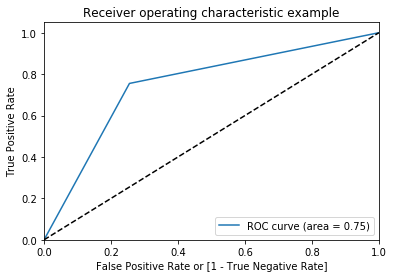

(array([0.        , 0.25502592, 1.        ]),
 array([0.        , 0.75507886, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [220]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

### Finding optimal Cut Off point

In [221]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

CustID  churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   24335      1    0.459489          0    1    1    1    1    1    0    0   
1   65406      1    0.201943          0    1    1    1    0    0    0    0   
2   34216      1    0.208367          0    1    1    1    0    0    0    0   
3   79419      1    0.763330          1    1    1    1    1    1    1    1   
4    5558      1    0.794883          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    0    0  
4    1    0    0

In [222]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500505  0.000000  1.000000
0.1   0.1  0.548061  0.117461  0.977792
0.2   0.2  0.605848  0.265520  0.945489
0.3   0.3  0.674308  0.450499  0.897666
0.4   0.4  0.723696  0.608800  0.838360
0.5   0.5  0.750032  0.744974  0.755079
0.6   0.6  0.747947  0.854343  0.641767
0.7   0.7  0.715865  0.929700  0.502461
0.8   0.8  0.652330  0.969781  0.335521
0.9   0.9  0.499495  1.000000  0.000000


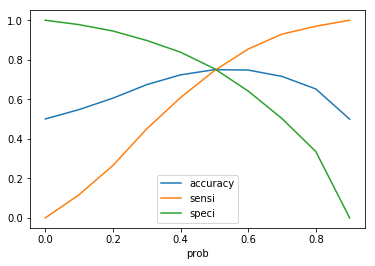

In [223]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

##### We are looking to maximize specificity and minimize sensitivity, So we will choose a optimal probability as 0.5

In [226]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [227]:
# Let's see the head
y_pred_final

CustID  churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0       24335      1    0.459489          0    1    1    1    1    1    0   
1       65406      1    0.201943          0    1    1    1    0    0    0   
2       34216      1    0.208367          0    1    1    1    0    0    0   
3       79419      1    0.763330          1    1    1    1    1    1    1   
4        5558      1    0.794883          1    1    1    1    1    1    1   
5       87959      0    0.590345          1    1    1    1    1    1    1   
6       43320      1    0.887706          1    1    1    1    1    1    1   
7       83063      1    0.632991          1    1    1    1    1    1    1   
8       58394      1    0.445435          0    1    1    1    1    1    0   
9       83062      1    0.464028          0    1    1    1    1    1    0   
10      76104      0    0.200122          0    1    1    1    0    0    0   
11      37423      0    0.349216          0    1    1    1    1    0    0   
12      57757      0    0.449925          0    1    1    1    1    1    0   
13       8368      1    0.857726          1    1    1    1    1    1    1   
14      25557      1    0.408555          0    1    1    1    1    1    0   
15      12249      1    0.785250          1    1    1    1    1    1    1   
16      99008      0    0.615693          1    1    1    1    1    1    1   
17      98186      0    0.461642          0    1    1    1    1    1    0   
18      89909      0    0.120381          0    1    1    0    0    0    0   
19      49522      1    0.488465          0    1    1    1    1    1    0   
20      72459      0    0.024647          0    1    0    0    0    0    0   
21      37655      1    0.888072          1    1    1    1    1    1    1   
22      99613      1    0.879259          1    1    1    1    1    1    1   
23      83851      1    0.851980          1    1    1    1    1    1    1   
24      23176      0    0.492056          0    1    1    1    1    1    0   
25      85931      0    0.507440          1    1    1    1    1    1    1   
26      58370      1    0.717359          1    1    1    1    1    1    1   
27      24766      0    0.247282          0    1    1    1    0    0    0   
28      22921      0    0.472315          0    1    1    1    1    1    0   
29      89090      1    0.163417          0    1    1    0    0    0    0   
...       ...    ...         ...        ...  ...  ...  ...  ...  ...  ...   
15804   56264      1    0.228166          0    1    1    1    0    0    0   
15805   35439      0    0.030128          0    1    0    0    0    0    0   
15806   87865      0    0.557345          1    1    1    1    1    1    1   
15807   56952      1    0.576791          1    1    1    1    1    1    1   
15808   42291      1    0.788671          1    1    1    1    1    1    1   
15809   95844      0    0.037994          0    1    0    0    0    0    0   
15810   27442      0    0.641169          1    1    1    1    1    1    1   
15811   10969      1    0.715339          1    1    1    1    1    1    1   
15812   69896      0    0.167837          0    1    1    0    0    0    0   
15813   25294      0    0.188351          0    1    1    0    0    0    0   
15814   14455      1    0.218267          0    1    1    1    0    0    0   
15815   64003      1    0.659340          1    1    1    1    1    1    1   
15816   61208      1    0.846513          1    1    1    1    1    1    1   
15817   43909      1    0.538707          1    1    1    1    1    1    1   
15818   22979      1    0.692214          1    1    1    1    1    1    1   
15819   51200      0    0.603452          1    1    1    1    1    1    1   
15820   96674      0    0.611100          1    1    1    1    1    1    1   
15821   39619      1    0.867594          1    1    1    1    1    1    1   
15822   64433      1    0.652445          1    1    1    1    1    1    1   
15823   37871      0    0.578125          1    1    1    1    1    1    1   
158

## Conclusion

Thus the important parameters for predicting Churn are:
   
   - % Reduction in total recharge amount from good phase to action phase
   - voice_usage- Whether the user does local or STD calls more.
   - % Reduction in Total outgoing minutes of usage from Good phase to action phase
   - % Reduction in total incoming minutes of usage 
   - % Reduction in last day recharge amount from Good phase to action phase.
   - The Volume of 3G mb used in the action phase
   - How many days back, the user has recharges in the action phase.
   - 'sep_vbc_3g' Volume based cost for 3G customers
   - '%_reduction_loc_og_t2f_mou' % reduction in Local Operator T to fixed lines of T outgoing minutes of usage
   - '%_reduction_std_og_t2m_mou', % Reduction in STD Operator T to other operator mobile outgoing minutes of usage
   - '%_reduction_std_ic_t2t_mou', % Reduction in incoming STD Operator T to T, i.e. within same operator (mobile to mobile) minutes of usage
   